<a href="https://colab.research.google.com/github/Ming1182/Ming1182/blob/main/SSv%26Rv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sympy

In [ ]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt


Sets: \\
A: Set of antigens \\
V: Set of vaccines \\
Aᵥ: Set of antigens supplied by vaccine v ∈ V, A_v ⊂ A \\
Vₐ: Set of vaccines supplying antigen a ∈ A, V_a ⊂ V \\

Parameters: \\
Supᵥ: Total supply of vaccine v ∈ V per day across all suppliers \\
mᵥ: Number of suppliers of vaccine v ∈ V \\
pᵥ: Probability of supply interruprion at suppliers of vaccine v ∈ V \\
ϕᵥₐ: Fraction of antigen a ∈ A demand supplied by vaccine v ∈ V \\
l : constant for the delivery time of vaccines from manufacturer to destinatio once supply is restored. \\

Variables: \\
Iₗ: Interruption length by given distribution with mean and standard deviation \\
Nᵥ: Number of suppliers of vaccine v ∈ V out of mᵥ facing supply interruption over a year. (Nᵥ ~ B(mᵥ,pᵥ)) \\
Kᵥ: Supply shortage levels of vaccine v ∈ V when vaccine v faces supply interruption \\
Dₐ: Lead-time demand for antigen a ∈ A across all vaccines facing interruption \\
Dᵥ: Lead-time demand for vaccine v ∈ V due to any common antigen supplying vaccines facing interruption \\

In [ ]:
Sup_v = symbols('Sup_v') #
m_v = symbols('m_v')
p_v = symbols('p_v')
V_Il = symbols('V_Il')
E_Il = symbols('E_Il')
l = symbols('l')
Z = symbols('Z')
phi_va= symbols('phi_va')


W_va = symbols('W_va')

# SSv - ss for a single vaccine
dSSv = (phi_va-1)*Z*(Sup_v/m_v)*(2*(m_v*p_v-m_v*(p_v**2)+(m_v**2)*(p_v**2))*V_Il+(m_v*p_v-m_v*(p_v**2))*((l**2)-2*l*E_Il+(E_Il**2)))**(1/2)
dSSv

Sup_v*Z*(phi_va - 1)*(V_Il*(2*m_v**2*p_v**2 - 2*m_v*p_v**2 + 2*m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 - 2*E_Il*l + l**2))**0.5/m_v

In [ ]:
dSSv_m = diff(dSSv, m_v)
print("dSSv/dm_v=")
print(dSSv_m)
dSSv_m

dSSv/dm_v=
Sup_v*Z*(phi_va - 1)*(0.5*V_Il*(4*m_v*p_v**2 - 2*p_v**2 + 2*p_v) + 0.5*(-p_v**2 + p_v)*(E_Il**2 - 2*E_Il*l + l**2))/(m_v*(V_Il*(2*m_v**2*p_v**2 - 2*m_v*p_v**2 + 2*m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 - 2*E_Il*l + l**2))**0.5) - Sup_v*Z*(phi_va - 1)*(V_Il*(2*m_v**2*p_v**2 - 2*m_v*p_v**2 + 2*m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 - 2*E_Il*l + l**2))**0.5/m_v**2


Sup_v*Z*(phi_va - 1)*(0.5*V_Il*(4*m_v*p_v**2 - 2*p_v**2 + 2*p_v) + 0.5*(-p_v**2 + p_v)*(E_Il**2 - 2*E_Il*l + l**2))/(m_v*(V_Il*(2*m_v**2*p_v**2 - 2*m_v*p_v**2 + 2*m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 - 2*E_Il*l + l**2))**0.5) - Sup_v*Z*(phi_va - 1)*(V_Il*(2*m_v**2*p_v**2 - 2*m_v*p_v**2 + 2*m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 - 2*E_Il*l + l**2))**0.5/m_v**2

Sup_v*Z*p_v*(phi_va - 1)*(-4*V_Il*(m_v*p_v - p_v + 1) + 2*V_Il*(2*m_v*p_v - p_v + 1) + (p_v - 1)*(E_Il**2 - 2*E_Il*l + l**2))/(2*m_v*sqrt(m_v*p_v*(2*V_Il*(m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 - 2*E_Il*l + l**2))))

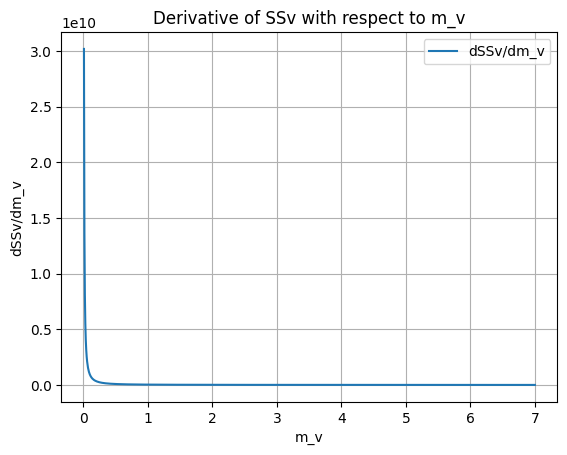

In [ ]:
import sympy as sp

m_v, p_v, V_Il, E_Il, l, Sup_v, phi_va, Z = sp.symbols('m_v p_v V_Il E_Il l Sup_v phi_va Z')


dSSv = (phi_va - 1) * Z * (Sup_v / m_v) * sp.sqrt(2*
    (m_v * p_v - m_v * (p_v**2) + (m_v**2) * (p_v**2)) * V_Il +
    (m_v * p_v - m_v * (p_v**2)) * ((l**2) - 2 * l * E_Il + (E_Il**2))
)

dSSv_dm_v = sp.diff(dSSv, m_v)


# Simplify the expression for clarity in order to reduce the running time
dSSv_dm_v_simplified = dSSv_dm_v.simplify()


# Parameters:
n = {p_v: 0.06, V_Il: 322.696, E_Il: 13.544, l: 7, Sup_v: 20399877, phi_va: 0.5, Z: 0.95} # phi_va r.v. := W_va/ sum of W_va (0,1)!

# Create a lambda function
dSSv_dm_v_func = sp.lambdify(m_v, dSSv_dm_v_simplified.subs(n), 'numpy')


# Values for m_v ranging from 0.01 to 20, avoiding zero to prevent division by zero errors
m_v_values = np.linspace(0.01, 7, 1000)


# Evaluate the derivative
dSSv_dm_v_values = dSSv_dm_v_func(m_v_values)



plt.plot(m_v_values, dSSv_dm_v_values, label='dSSv/dm_v')
plt.title('Derivative of SSv with respect to m_v')
plt.xlabel('m_v')
plt.ylabel('dSSv/dm_v')
plt.grid(True)
plt.legend()


dSSv_dm_v_simplified

<lambdifygenerated-109>:2: RuntimeWarning: divide by zero encountered in divide
  return -4844970.7875*(688.215936 - 85.647872*p_v)/sqrt(p_v*(688.215936 - 42.823936*p_v))


Sup_v*Z*(phi_va - 1)*(2*V_Il*(2*m_v*p_v - 2*p_v + 1) - (2*p_v - 1)*(E_Il**2 - 2*E_Il*l + l**2))/(2*sqrt(m_v*p_v*(2*V_Il*(m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 - 2*E_Il*l + l**2))))

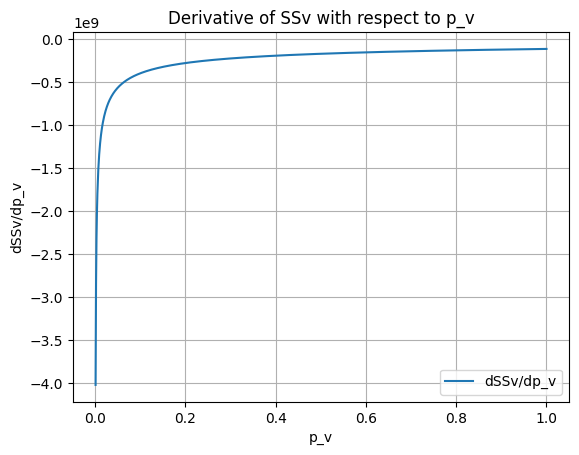

In [ ]:
dSSv_dp_v = sp.diff(dSSv, p_v)

# Simplify the expression for clarity in order to reduce the running time

dSSv_dp_v_simplified = dSSv_dp_v.simplify()

# Parameters:
n = {m_v: 1, V_Il: 322.696, E_Il: 13.544, l: 7, Sup_v: 20399877, phi_va: 0.5, Z: 0.95}

# Create a lambda function
dSSv_dp_v_func = sp.lambdify(p_v, dSSv_dp_v_simplified.subs(n), 'numpy')


p_v_values = np.linspace(0, 1, 1000)

# Evaluate the derivative
dSSv_dp_v_values = dSSv_dp_v_func(p_v_values)


plt.plot(p_v_values, dSSv_dp_v_values, label='dSSv/dp_v')
plt.title('Derivative of SSv with respect to p_v')
plt.xlabel('p_v')
plt.ylabel('dSSv/dp_v')
plt.grid(True)
plt.legend()

dSSv_dp_v_simplified

-Sup_v*Z*p_v*(E_Il - l)*(p_v - 1)*(phi_va - 1)/sqrt(m_v*p_v*(2*V_Il*(m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 - 2*E_Il*l + l**2)))

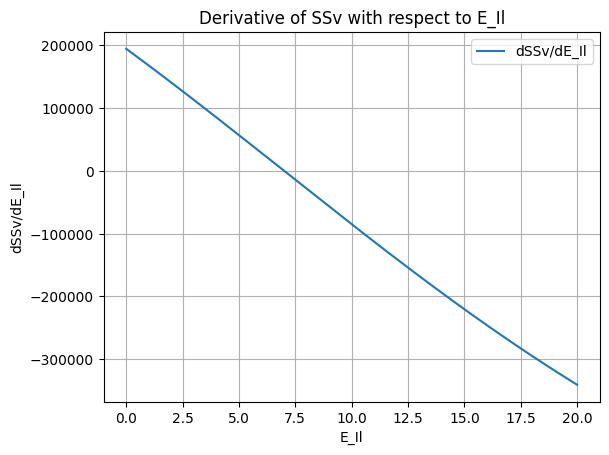

In [ ]:
dSSv_dE = sp.diff(dSSv, E_Il)

# Simplify the expression for clarity in order to reduce the running time

dSSv_dE_simplified = dSSv_dE.simplify()

# Parameters:
n = {m_v: 7, V_Il: 322.696, p_v: 0.06, l: 7, Sup_v: 20399877, phi_va: 0.5, Z: 0.95}

# Create a lambda function
dSSv_dE_func = sp.lambdify(E_Il, dSSv_dE_simplified.subs(n), 'numpy')


E_Il_values = np.linspace(0, 20, 1000)

# Evaluate the derivative
dSSv_dE_values = dSSv_dE_func(E_Il_values)


plt.plot(E_Il_values, dSSv_dE_values, label='dSSv/dE_Il')
plt.title('Derivative of SSv with respect to E_Il')
plt.xlabel('E_Il')
plt.ylabel('dSSv/dE_Il')
plt.grid(True)
plt.legend()

dSSv_dE_simplified

Sup_v*Z*p_v*(phi_va - 1)*(m_v*p_v - p_v + 1)/sqrt(m_v*p_v*(2*V_Il*(m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 - 2*E_Il*l + l**2)))

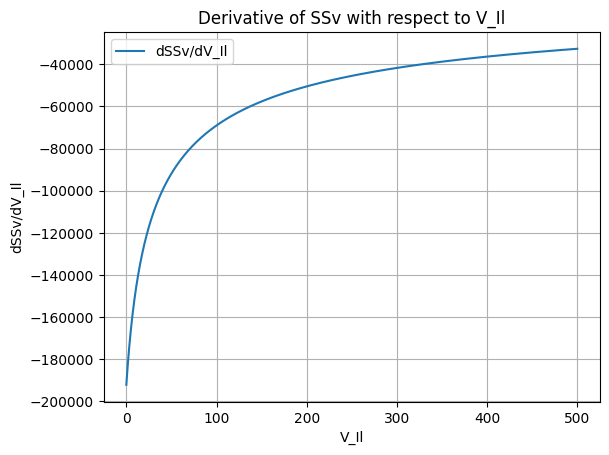

In [ ]:
dSSv_dV = sp.diff(dSSv, V_Il)

# Simplify the expression for clarity in order to reduce the running time

dSSv_dV_simplified = dSSv_dV.simplify()

# Parameters:
n = {m_v: 7, E_Il: 13.544, p_v: 0.06, l: 7, Sup_v: 20399877, phi_va: 0.5, Z: 0.95}

# Create a lambda function
dSSv_dV_func = sp.lambdify(V_Il, dSSv_dV_simplified.subs(n), 'numpy')


V_Il_values = np.linspace(0, 500, 1000)

# Evaluate the derivative
dSSv_dV_values = dSSv_dV_func(V_Il_values)


plt.plot(V_Il_values, dSSv_dV_values, label='dSSv/dV_Il')
plt.title('Derivative of SSv with respect to V_Il')
plt.xlabel('V_Il')
plt.ylabel('dSSv/dV_Il')
plt.grid(True)
plt.legend()

dSSv_dV_simplified

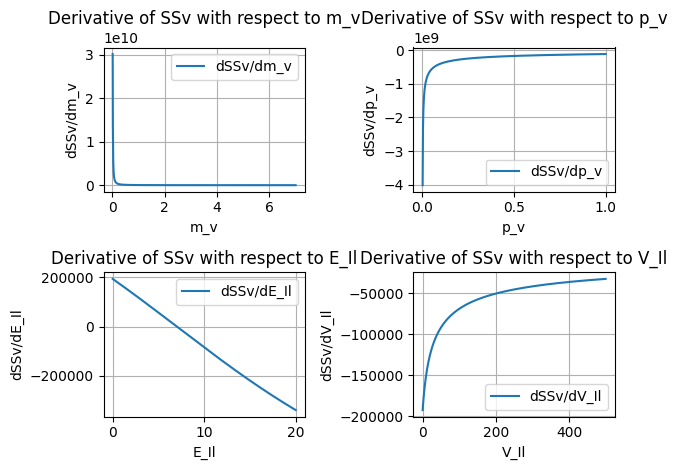

In [ ]:
# plots:
plt.subplot(2, 2, 1)
plt.plot(m_v_values, dSSv_dm_v_values, label='dSSv/dm_v')
plt.title('Derivative of SSv with respect to m_v')
plt.xlabel('m_v')
plt.ylabel('dSSv/dm_v')
plt.grid(True)
plt.legend()

# Subplot for derivative with respect to p_v
plt.subplot(2,2,2 )
plt.plot(p_v_values, dSSv_dp_v_values, label='dSSv/dp_v')
plt.title('Derivative of SSv with respect to p_v')
plt.xlabel('p_v')
plt.ylabel('dSSv/dp_v')
plt.grid(True)
plt.legend()

# Subplot for derivative with respect to Sup_v
# plt.subplot(2, 2, 1)
# plt.plot(Sup_v_values, dSSv_dSup_v_values, label='dSSv/dSup_v')
# plt.title('Derivative of SSv with respect to Sup_v')
# plt.xlabel('Sup_v')
# plt.ylabel('dSSv/dSup_v')
# plt.grid(True)
# plt.legend()

# Subplot for derivative with respect to E_Il
plt.subplot(2, 2, 3)
plt.plot(E_Il_values, dSSv_dE_values, label='dSSv/dE_Il')
plt.title('Derivative of SSv with respect to E_Il')
plt.xlabel('E_Il')
plt.ylabel('dSSv/dE_Il')
plt.grid(True)
plt.legend()

# Subplot for derivative with respect to V_Il
plt.subplot(2, 2, 4)
plt.plot(V_Il_values, dSSv_dV_values, label='dSSv/dV_Il')
plt.title('Derivative of SSv with respect to V_Il')
plt.xlabel('V_Il')
plt.ylabel('dSSv/dV_Il')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# from scipy.stats import norm


# phi_va = {
#     'Penta': {'DTwP':0.3, 'Hib': 0.4, 'HepB': 0.3},
#     'DTwP': {'Diphtheria': 1.0},
#     'Hib': {'Hib': 1.0},
#     'HepB': {'HepB': 1.0}
# }

# data = {
#     'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
#     'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
#     'm_v': [1, 7, 7, 1],
#     'p_v': [0.20, 0.06, 0.06, 0.20],
#     'mu_I_l': [12.3, 12.3, 12.3, 12.3],
#     'sigma_I_l': [42.06, 42.06, 42.06,42.06]
# }
# df = pd.DataFrame(data)

# # Constants
# l = 7  # Lead time in days
# alpha = 0.95  # Service level

# # Expected N_v and variance V[N_v]
# df['E_N_v'] = df['m_v'] * df['p_v']
# df['V_N_v'] = df['m_v'] * df['p_v'] * (1 - df['p_v'])

# # Expected K_v and variance V[K_v]
# df['E_K_v'] = (df['Sup_v'] / df['m_v']) * df['E_N_v'] * (l + df['mu_I_l'])
# df['V_K_v'] = ((df['Sup_v'] / df['m_v'])**2) * ((df['V_N_v']*(df['sigma_I_l']**2))+df['V_N_v'] * (l**2 + 2 * l * df['mu_I_l'] + df['mu_I_l']**2) + df['E_N_v']**2 * (df['sigma_I_l']**2))


# A_v = {
#     'Penta': ['DTwP', 'Hib', 'HepB'],
#     'DTwP': ['DTwP'],
#     'Hib': ['Hib'],
#     'HepB': ['HepB']
# }

# # Expected lead-time demand and its variance for antigens
# D_a = {antigen: 0 for sublist in A_v.values() for antigen in sublist}
# V_D_a = {antigen: 0 for sublist in A_v.values() for antigen in sublist}

# for vaccine, antigens in A_v.items():
#     for antigen in antigens:
#         D_a[antigen] += phi_va[vaccine][antigen] * df.loc[df['vaccine'] == vaccine, 'E_K_v'].values[0]
#         V_D_a[antigen] += phi_va[vaccine][antigen]**2 * df.loc[df['vaccine'] == vaccine, 'V_K_v'].values[0]

# # Determine the critical antigen which is phi_va for each vaccine and calculate safety stock
# results = {}
# for vaccine in A_v:
#     critical_antigen = max(A_v[vaccine], key=lambda a: phi_va[vaccine][a] * D_a[a])  # Max expected antigen
#     E_D_v = phi_va[vaccine][critical_antigen] * D_a[critical_antigen]  # Expected demand for the vaccine
#     V_D_v = phi_va[vaccine][critical_antigen]**2 * V_D_a[critical_antigen]  # Variance for the vaccine
#     SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)  # Safety stock
#     R_v = E_D_v + SS_v  # Re-order level

#     results[vaccine] = {
#         'Critical Antigen': critical_antigen,
#         'Expected Lead-time Demand': E_D_v,
#         'Variance of Demand': V_D_v,
#         'Safety Stock': SS_v,
#         'Re-order Level': R_v
#     }


# results


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105,105]
}
df = pd.DataFrame(data)

#each vaccine's effectiveness per antigen

phi_va = {
    'Penta': {'DTwP':0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'Diphtheria': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

antigens = ['DTwP', 'Hib', 'HepB']


def calculate_outcomes(df):
    l = 7  # Lead time
    alpha = 0.97  # Service level
    results = {}

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v*(row['sigma_I_l']**2))+V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key= vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results[vaccine] = {
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        }

    return results

# Calculate and print the outcomes
outcomes = calculate_outcomes(df)
for vaccine, info in outcomes.items():
    print(f"Vaccine: {vaccine}, Critical Antigen: {info['Critical Antigen']}, Expected Lead-time Demand: {info['Expected Lead-time Demand']}, Safety Stock: {info['Safety Stock']}, Re-order Level: {info['Re-order Level']}")




Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 1036284.2252157, Safety Stock: 4271484.829051869, Re-order Level: 5307769.0542675685
Vaccine: DTwP, Critical Antigen: Diphtheria, Expected Lead-time Demand: 16072.979819639999, Safety Stock: 50205.123658618024, Re-order Level: 66278.10347825802
Vaccine: Hib, Critical Antigen: Hib, Expected Lead-time Demand: 6893.497608872701, Safety Stock: 21532.3420907271, Re-order Level: 28425.8396995998
Vaccine: HepB, Critical Antigen: HepB, Expected Lead-time Demand: 483805.2470925074, Safety Stock: 1994208.4641317255, Re-order Level: 2478013.711224233


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define the original data
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen including a possible supply interruption
phi_va = {
    'Penta': {'DTwP': 0.3, 'Hib': 0.2, 'HepB': 0.0},  # HepB effectiveness reduced to 0 due to supply interruption
    'DTwP': {'Diphtheria': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_outcomes_modified(df, phi_va):
    l = 7  # Lead time
    alpha = 0.95  # Service level
    results = {}

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        if vaccine in phi_va:
            vaccine_contributions = {ant: phi_va[vaccine].get(ant, 0) * total_supplied for ant in phi_va[vaccine]}
            critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)
            E_D_v = vaccine_contributions[critical_antigen]
            V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
            SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
            R_v = E_D_v + SS_v

            results[vaccine] = {
                'Critical Antigen': critical_antigen,
                'Expected Lead-time Demand': E_D_v,
                'Safety Stock': SS_v,
                'Re-order Level': R_v
            }

    return results

# Calculate and print the outcomes after simulating the supply interruption
outcomes_modified = calculate_outcomes_modified(df, phi_va)
for vaccine, info in outcomes_modified.items():
    print(f"Vaccine: {vaccine}, Critical Antigen: {info['Critical Antigen']}, Expected Lead-time Demand: {info['Expected Lead-time Demand']}, Safety Stock: {info['Safety Stock']}, Re-order Level: {info['Re-order Level']}")


Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 414513.69008627994, Safety Stock: 1494255.8892339955, Re-order Level: 1908769.5793202755
Vaccine: DTwP, Critical Antigen: Diphtheria, Expected Lead-time Demand: 16072.979819639999, Safety Stock: 43907.0397642398, Re-order Level: 59980.0195838798
Vaccine: Hib, Critical Antigen: Hib, Expected Lead-time Demand: 6893.497608872701, Safety Stock: 18831.173623301725, Re-order Level: 25724.671232174427
Vaccine: HepB, Critical Antigen: HepB, Expected Lead-time Demand: 483805.2470925074, Safety Stock: 1744040.9255477467, Re-order Level: 2227846.1726402543


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define the original data
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 0],  # Set HepB supply to 0 due to supply interruption
    'm_v': [1, 7, 7, 1], # m_v for HepB gave the value 1 since m_v is in the denominator in the formulation to avoid the program error.
                        # This can also mean a supply interruption occurs due to the only supplier in the system for HepB monovalent vaccine.
    'p_v': [0.20, 0.06, 0.06, 1], # The probability of supply interruption of HepB should be one hundred percent.
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen
phi_va = {
    'Penta': {'DTwP': 0.3, 'Hib': 0.2, 'HepB': 0.0},  # HepB effectiveness reduced to 0 due to supply interruption
    'DTwP': {'Diphtheria': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 0.0}  # HepB effectiveness reduced to 0 due to supply interruption
}

def calculate_outcomes_modified(df, phi_va):
    l = 7  # Lead time
    alpha = 0.95  # Service level
    results = {}

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        if vaccine in phi_va:
            vaccine_contributions = {ant: phi_va[vaccine].get(ant, 0) * total_supplied for ant in phi_va[vaccine]}
            if vaccine_contributions:
                critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)
                E_D_v = vaccine_contributions[critical_antigen]
                V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
                SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
                R_v = E_D_v + SS_v

                results[vaccine] = {
                    'Critical Antigen': critical_antigen,
                    'Expected Lead-time Demand': E_D_v,
                    'Safety Stock': SS_v,
                    'Re-order Level': R_v
                }
            else:
                results[vaccine] = {
                    'Critical Antigen': None,
                    'Expected Lead-time Demand': 0,
                    'Safety Stock': 0,
                    'Re-order Level': 0
                }

    return results

# Calculate and print the outcomes after simulating the supply interruption
outcomes_modified = calculate_outcomes_modified(df, phi_va)
for vaccine, info in outcomes_modified.items():
    print(f"Vaccine: {vaccine}, Critical Antigen: {info['Critical Antigen']}, Expected Lead-time Demand: {info['Expected Lead-time Demand']}, Safety Stock: {info['Safety Stock']}, Re-order Level: {info['Re-order Level']}")


Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 414513.69008627994, Safety Stock: 1494255.8892339955, Re-order Level: 1908769.5793202755
Vaccine: DTwP, Critical Antigen: Diphtheria, Expected Lead-time Demand: 16072.979819639999, Safety Stock: 43907.0397642398, Re-order Level: 59980.0195838798
Vaccine: Hib, Critical Antigen: Hib, Expected Lead-time Demand: 6893.497608872701, Safety Stock: 18831.173623301725, Re-order Level: 25724.671232174427
Vaccine: HepB, Critical Antigen: HepB, Expected Lead-time Demand: 0.0, Safety Stock: 0.0, Re-order Level: 0.0


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define the original data
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 0],  # Set HepB supply to 0 due to interruption
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen
phi_va = {
    'Penta': {'DTwP': 0.3, 'Hib': 0.2, 'HepB': 0.0},  # HepB effectiveness reduced to 0 due to supply interruption
    'DTwP': {'Diphtheria': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 0.0}  # HepB effectiveness reduced to 0 due to supply interruption
}

def calculate_outcomes_modified(df, phi_va):
    l = 7  # Lead time
    alpha = 0.95  # Service level
    results = {}

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        if vaccine in phi_va:
            vaccine_contributions = {ant: phi_va[vaccine].get(ant, 0) * total_supplied for ant in phi_va[vaccine]}
            if vaccine_contributions:
                critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)
                E_D_v = vaccine_contributions[critical_antigen]
                V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
                SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
                R_v = E_D_v + SS_v

                results[vaccine] = {
                    'Critical Antigen': critical_antigen,
                    'Expected Lead-time Demand': E_D_v,
                    'Safety Stock': SS_v,
                    'Re-order Level': R_v
                }
            else:
                results[vaccine] = {
                    'Critical Antigen': None,
                    'Expected Lead-time Demand': 0,
                    'Safety Stock': 0,
                    'Re-order Level': 0
                }

    return results

# Calculate and print the outcomes after simulating the supply interruption
outcomes_modified = calculate_outcomes_modified(df, phi_va)
for vaccine, info in outcomes_modified.items():
    print(f"Vaccine: {vaccine}, Critical Antigen: {info['Critical Antigen']}, Expected Lead-time Demand: {info['Expected Lead-time Demand']}, Safety Stock: {info['Safety Stock']}, Re-order Level: {info['Re-order Level']}")


Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 414513.69008627994, Safety Stock: 1494255.8892339955, Re-order Level: 1908769.5793202755
Vaccine: DTwP, Critical Antigen: Diphtheria, Expected Lead-time Demand: 16072.979819639999, Safety Stock: 43907.0397642398, Re-order Level: 59980.0195838798
Vaccine: Hib, Critical Antigen: Hib, Expected Lead-time Demand: 6893.497608872701, Safety Stock: 18831.173623301725, Re-order Level: 25724.671232174427
Vaccine: HepB, Critical Antigen: HepB, Expected Lead-time Demand: 0.0, Safety Stock: 0.0, Re-order Level: 0.0


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define the original data
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 0],  # Set HepB supply to 0 due to interruption
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen
phi_va = {
    'Penta': {'DTwP': 0.3, 'Hib': 0.2, 'HepB': 0.0},  # HepB effectiveness reduced to 0 due to supply interruption
    'DTwP': {'Diphtheria': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 0.0}  # HepB effectiveness reduced to 0 due to supply interruption
}

def calculate_outcomes_modified(df, phi_va):
    l = 7  # Lead time
    alpha = 0.97  # Service level
    results = {}

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        if vaccine in phi_va:
            vaccine_contributions = {ant: phi_va[vaccine].get(ant, 0) * total_supplied for ant in phi_va[vaccine]}
            if vaccine_contributions:
                critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)
                E_D_v = vaccine_contributions[critical_antigen]
                V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
                SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
                R_v = E_D_v + SS_v

                results[vaccine] = {
                    'Critical Antigen': critical_antigen,
                    'Expected Lead-time Demand': E_D_v,
                    'Safety Stock': SS_v,
                    'Re-order Level': R_v
                }
            else:
                results[vaccine] = {
                    'Critical Antigen': None,
                    'Expected Lead-time Demand': 0,
                    'Safety Stock': 0,
                    'Re-order Level': 0
                }

    return results

# Calculate and print the outcomes after simulating the supply interruption
outcomes_modified = calculate_outcomes_modified(df, phi_va)
for vaccine, info in outcomes_modified.items():
    print(f"Vaccine: {vaccine}, Critical Antigen: {info['Critical Antigen']}, Expected Lead-time Demand: {info['Expected Lead-time Demand']}, Safety Stock: {info['Safety Stock']}, Re-order Level: {info['Re-order Level']}")


Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 414513.69008627994, Safety Stock: 1708593.9316207475, Re-order Level: 2123107.6217070273
Vaccine: DTwP, Critical Antigen: Diphtheria, Expected Lead-time Demand: 16072.979819639999, Safety Stock: 50205.123658618024, Re-order Level: 66278.10347825802
Vaccine: Hib, Critical Antigen: Hib, Expected Lead-time Demand: 6893.497608872701, Safety Stock: 21532.3420907271, Re-order Level: 28425.8396995998
Vaccine: HepB, Critical Antigen: HepB, Expected Lead-time Demand: 0.0, Safety Stock: 0.0, Re-order Level: 0.0


In [ ]:
# Different servive level for penta vaccine

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data specific to the Penta vaccine
data = {
    'vaccine': ['Penta'],
    'Sup_v': [26368.555349],
    'm_v': [1],
    'p_v': [0.20],
    'mu_I_l': [255],
    'sigma_I_l': [105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for the Penta vaccine
phi_va = {
    'Penta': {'DTwP':0.75, 'Hib': 0.125, 'HepB': 0.125}
}

# Define the antigens that Penta vaccine affects
antigens = ['DTwP', 'Hib', 'HepB']

def calculate_penta_outcome(df):
    l = 7  # Lead time
    alpha = 0.95  # Service level

    # Assuming there is only one row for the Penta vaccine
    row = df.iloc[0]
    vaccine = row['vaccine']
    E_N_v = row['m_v'] * row['p_v']
    V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
    total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
    total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v*(row['sigma_I_l']**2))+V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

    # Calculate the vaccine's contribution to each antigen it supplies
    vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
    critical_antigen = max(vaccine_contributions, key= vaccine_contributions.get)

    E_D_v = vaccine_contributions[critical_antigen]
    V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
    SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
    R_v = E_D_v + SS_v

    return {
        'Vaccine': vaccine,
        'Critical Antigen': critical_antigen,
        'Expected Lead-time Demand': E_D_v,
        'Safety Stock': SS_v,
        'Re-order Level': R_v
    }

# Calculate and print the outcome for the Penta vaccine
outcome = calculate_penta_outcome(df)
print(f"Vaccine: {outcome['Vaccine']}, Critical Antigen: {outcome['Critical Antigen']}, Expected Lead-time Demand: {outcome['Expected Lead-time Demand']}, Safety Stock: {outcome['Safety Stock']}, Re-order Level: {outcome['Re-order Level']}")


Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 1036284.2252157, Safety Stock: 3735639.723084989, Re-order Level: 4771923.948300689


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Vaccine data
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105,105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen, modify Hib effectiveness for Penta vaccine
phi_va = {
    'Penta': {'DTwP':0.75, 'Hib': 0.125, 'HepB': 0.125},  # Reduced effectiveness for Hib
    'DTwP': {'Diphtheria': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_outcomes(df, phi_va):
    l = 7  # Lead time
    alpha = 0.95  # Service level
    results = {}

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v*(row['sigma_I_l']**2))+V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results[vaccine] = {
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        }

    return results

# Calculate outcomes with the modified effectiveness
outcomes_after_interruption = calculate_outcomes(df, phi_va)

# Display the outcomes after the interruption
for vaccine, info in outcomes_after_interruption.items():
    print(f"Vaccine: {vaccine}, Critical Antigen: {info['Critical Antigen']}, Expected Lead-time Demand: {info['Expected Lead-time Demand']}, Safety Stock: {info['Safety Stock']}, Re-order Level: {info['Re-order Level']}")


Vaccine: Penta, Critical Antigen: HepB, Expected Lead-time Demand: 690856.1501438, Safety Stock: 2490426.482056659, Re-order Level: 3181282.632200459
Vaccine: DTwP, Critical Antigen: Diphtheria, Expected Lead-time Demand: 16072.979819639999, Safety Stock: 43907.0397642398, Re-order Level: 59980.0195838798
Vaccine: Hib, Critical Antigen: Hib, Expected Lead-time Demand: 6893.497608872701, Safety Stock: 18831.173623301725, Re-order Level: 25724.671232174427
Vaccine: HepB, Critical Antigen: HepB, Expected Lead-time Demand: 483805.2470925074, Safety Stock: 1744040.9255477467, Re-order Level: 2227846.1726402543


In [ ]:
# 90% service level for monovalent vaccines and combination vaccines

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105,105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.90  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  2.910542e+06   
1    DTwP             DTwP               1.607298e+04  3.420921e+04   
2     Hib              Hib               6.893498e+03  1.467190e+04   
3    HepB             HepB               4.838052e+05  1.358831e+06   

   Re-order Level  
0    3.946826e+06  
1    5.028219e+04  
2    2.156539e+04  
3    1.842636e+06  


In [ ]:
# 95% service level for monovalent vaccines and combination vaccines

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105,105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.95  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  3.735640e+06   
1    DTwP             DTwP               1.607298e+04  4.390704e+04   
2     Hib              Hib               6.893498e+03  1.883117e+04   
3    HepB             HepB               4.838052e+05  1.744041e+06   

   Re-order Level  
0    4.771924e+06  
1    5.998002e+04  
2    2.572467e+04  
3    2.227846e+06  


In [ ]:
# 97% service level for monovalent vaccines and combination vaccines
import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105,105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.97  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  4.271485e+06   
1    DTwP             DTwP               1.607298e+04  5.020512e+04   
2     Hib              Hib               6.893498e+03  2.153234e+04   
3    HepB             HepB               4.838052e+05  1.994208e+06   

   Re-order Level  
0    5.307769e+06  
1    6.627810e+04  
2    2.842584e+04  
3    2.478014e+06  


In [ ]:
# In 90% service level, if the monovalent DTwP vaccine is missing, we need to account for the increased demand for the DTwP antigen
# that the Penta vaccine will need to fulfill. This would likely result in a higher expected lead-time demand and an increased safety
# stock and reorder point for the Penta vaccine.

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.90  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)

# Calculate the additional Penta vaccine supply needed to fulfill the missing DTwP demand
def calculate_additional_penta(df, alpha=0.90):
    l = 7  # Lead time

    # Get the row for the missing DTwP vaccine
    dtwp_row = df[df['vaccine'] == 'DTwP'].iloc[0]

    E_N_dtwp = dtwp_row['m_v'] * dtwp_row['p_v']
    V_N_dtwp = dtwp_row['m_v'] * dtwp_row['p_v'] * (1 - dtwp_row['p_v'])
    total_dtwp_supplied = (dtwp_row['Sup_v'] / dtwp_row['m_v']) * E_N_dtwp * (l + dtwp_row['mu_I_l'])
    total_dtwp_variance = ((dtwp_row['Sup_v'] / dtwp_row['m_v'])**2) * ((V_N_dtwp * (dtwp_row['sigma_I_l']**2)) + V_N_dtwp * (l**2 + 2 * l * dtwp_row['mu_I_l'] + dtwp_row['mu_I_l']**2) + E_N_dtwp**2 * (dtwp_row['sigma_I_l']**2))

    # Increase the Penta supply to cover the missing DTwP
    penta_row = df[df['vaccine'] == 'Penta'].iloc[0].copy()
    penta_row['Sup_v'] += total_dtwp_supplied / 0.75  # Adjust for Penta's effectiveness for DTwP

    # Recalculate the outcomes for the Penta vaccine
    E_N_penta = penta_row['m_v'] * penta_row['p_v']
    V_N_penta = penta_row['m_v'] * penta_row['p_v'] * (1 - penta_row['p_v'])
    total_supplied_penta = (penta_row['Sup_v'] / penta_row['m_v']) * E_N_penta * (l + penta_row['mu_I_l'])
    total_variance_penta = ((penta_row['Sup_v'] / penta_row['m_v'])**2) * ((V_N_penta * (penta_row['sigma_I_l']**2)) + V_N_penta * (l**2 + 2 * l * penta_row['mu_I_l'] + penta_row['mu_I_l']**2) + E_N_penta**2 * (penta_row['sigma_I_l']**2))

    # Calculate the Penta's contribution to DTwP
    E_D_penta = 0.75 * total_supplied_penta
    V_D_penta = (0.75**2) * total_variance_penta
    SS_penta = norm.ppf(alpha) * np.sqrt(V_D_penta)
    R_penta = E_D_penta + SS_penta

    return {
        'Vaccine': penta_row['vaccine'],
        'Critical Antigen': 'DTwP',
        'Expected Lead-time Demand': E_D_penta,
        'Safety Stock': SS_penta,
        'Re-order Level': R_penta
    }

additional_penta_outcome = calculate_additional_penta(df, alpha=0.90)
print(f"After accounting for missing DTwP vaccine, updated Penta vaccine outcomes:")
print(f"Vaccine: {additional_penta_outcome['Vaccine']}, Critical Antigen: {additional_penta_outcome['Critical Antigen']}, Expected Lead-time Demand: {additional_penta_outcome['Expected Lead-time Demand']}, Safety Stock: {additional_penta_outcome['Safety Stock']}, Re-order Level: {additional_penta_outcome['Re-order Level']}")


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  2.910542e+06   
1    DTwP             DTwP               1.607298e+04  3.420921e+04   
2     Hib              Hib               6.893498e+03  1.467190e+04   
3    HepB             HepB               4.838052e+05  1.358831e+06   

   Re-order Level  
0    3.946826e+06  
1    5.028219e+04  
2    2.156539e+04  
3    1.842636e+06  
After accounting for missing DTwP vaccine, updated Penta vaccine outcomes:
Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 1878508.367764836, Safety Stock: 5276039.767452259, Re-order Level: 7154548.135217095


In [ ]:
# In 95% service level, if the monovalent DTwP vaccine is missing, we need to account for the increased demand for the DTwP antigen
# that the Penta vaccine will need to fulfill. This would likely result in a higher expected lead-time demand and an increased safety
# stock and reorder point for the Penta vaccine.

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.95  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)

# Calculate the additional Penta vaccine supply needed to fulfill the missing DTwP demand
def calculate_additional_penta(df, alpha=0.95):
    l = 7  # Lead time

    # Get the row for the missing DTwP vaccine
    dtwp_row = df[df['vaccine'] == 'DTwP'].iloc[0]

    E_N_dtwp = dtwp_row['m_v'] * dtwp_row['p_v']
    V_N_dtwp = dtwp_row['m_v'] * dtwp_row['p_v'] * (1 - dtwp_row['p_v'])
    total_dtwp_supplied = (dtwp_row['Sup_v'] / dtwp_row['m_v']) * E_N_dtwp * (l + dtwp_row['mu_I_l'])
    total_dtwp_variance = ((dtwp_row['Sup_v'] / dtwp_row['m_v'])**2) * ((V_N_dtwp * (dtwp_row['sigma_I_l']**2)) + V_N_dtwp * (l**2 + 2 * l * dtwp_row['mu_I_l'] + dtwp_row['mu_I_l']**2) + E_N_dtwp**2 * (dtwp_row['sigma_I_l']**2))

    # Increase the Penta supply to cover the missing DTwP
    penta_row = df[df['vaccine'] == 'Penta'].iloc[0].copy()
    penta_row['Sup_v'] += total_dtwp_supplied / 0.75  # Adjust for Penta's effectiveness for DTwP

    # Recalculate the outcomes for the Penta vaccine
    E_N_penta = penta_row['m_v'] * penta_row['p_v']
    V_N_penta = penta_row['m_v'] * penta_row['p_v'] * (1 - penta_row['p_v'])
    total_supplied_penta = (penta_row['Sup_v'] / penta_row['m_v']) * E_N_penta * (l + penta_row['mu_I_l'])
    total_variance_penta = ((penta_row['Sup_v'] / penta_row['m_v'])**2) * ((V_N_penta * (penta_row['sigma_I_l']**2)) + V_N_penta * (l**2 + 2 * l * penta_row['mu_I_l'] + penta_row['mu_I_l']**2) + E_N_penta**2 * (penta_row['sigma_I_l']**2))

    # Calculate the Penta's contribution to DTwP
    E_D_penta = 0.75 * total_supplied_penta
    V_D_penta = (0.75**2) * total_variance_penta
    SS_penta = norm.ppf(alpha) * np.sqrt(V_D_penta)
    R_penta = E_D_penta + SS_penta

    return {
        'Vaccine': penta_row['vaccine'],
        'Critical Antigen': 'DTwP',
        'Expected Lead-time Demand': E_D_penta,
        'Safety Stock': SS_penta,
        'Re-order Level': R_penta
    }

additional_penta_outcome = calculate_additional_penta(df, alpha=0.95)
print(f"After accounting for missing DTwP vaccine, updated Penta vaccine outcomes:")
print(f"Vaccine: {additional_penta_outcome['Vaccine']}, Critical Antigen: {additional_penta_outcome['Critical Antigen']}, Expected Lead-time Demand: {additional_penta_outcome['Expected Lead-time Demand']}, Safety Stock: {additional_penta_outcome['Safety Stock']}, Re-order Level: {additional_penta_outcome['Re-order Level']}")


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  3.735640e+06   
1    DTwP             DTwP               1.607298e+04  4.390704e+04   
2     Hib              Hib               6.893498e+03  1.883117e+04   
3    HepB             HepB               4.838052e+05  1.744041e+06   

   Re-order Level  
0    4.771924e+06  
1    5.998002e+04  
2    2.572467e+04  
3    2.227846e+06  
After accounting for missing DTwP vaccine, updated Penta vaccine outcomes:
Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 1878508.367764836, Safety Stock: 6771723.729857227, Re-order Level: 8650232.097622063


In [ ]:
# In 97% service level, if the monovalent DTwP vaccine is missing, we need to account for the increased demand for the DTwP antigen
# that the Penta vaccine will need to fulfill. This would likely result in a higher expected lead-time demand and an increased safety
# stock and reorder point for the Penta vaccine.

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.97  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)

# Calculate the additional Penta vaccine supply needed to fulfill the missing DTwP demand
def calculate_additional_penta(df, alpha=0.97):
    l = 7  # Lead time

    # Get the row for the missing DTwP vaccine
    dtwp_row = df[df['vaccine'] == 'DTwP'].iloc[0]

    E_N_dtwp = dtwp_row['m_v'] * dtwp_row['p_v']
    V_N_dtwp = dtwp_row['m_v'] * dtwp_row['p_v'] * (1 - dtwp_row['p_v'])
    total_dtwp_supplied = (dtwp_row['Sup_v'] / dtwp_row['m_v']) * E_N_dtwp * (l + dtwp_row['mu_I_l'])
    total_dtwp_variance = ((dtwp_row['Sup_v'] / dtwp_row['m_v'])**2) * ((V_N_dtwp * (dtwp_row['sigma_I_l']**2)) + V_N_dtwp * (l**2 + 2 * l * dtwp_row['mu_I_l'] + dtwp_row['mu_I_l']**2) + E_N_dtwp**2 * (dtwp_row['sigma_I_l']**2))

    # Increase the Penta supply to cover the missing DTwP
    penta_row = df[df['vaccine'] == 'Penta'].iloc[0].copy()
    penta_row['Sup_v'] += total_dtwp_supplied / 0.75  # Adjust for Penta's effectiveness for DTwP

    # Recalculate the outcomes for the Penta vaccine
    E_N_penta = penta_row['m_v'] * penta_row['p_v']
    V_N_penta = penta_row['m_v'] * penta_row['p_v'] * (1 - penta_row['p_v'])
    total_supplied_penta = (penta_row['Sup_v'] / penta_row['m_v']) * E_N_penta * (l + penta_row['mu_I_l'])
    total_variance_penta = ((penta_row['Sup_v'] / penta_row['m_v'])**2) * ((V_N_penta * (penta_row['sigma_I_l']**2)) + V_N_penta * (l**2 + 2 * l * penta_row['mu_I_l'] + penta_row['mu_I_l']**2) + E_N_penta**2 * (penta_row['sigma_I_l']**2))

    # Calculate the Penta's contribution to DTwP
    E_D_penta = 0.75 * total_supplied_penta
    V_D_penta = (0.75**2) * total_variance_penta
    SS_penta = norm.ppf(alpha) * np.sqrt(V_D_penta)
    R_penta = E_D_penta + SS_penta

    return {
        'Vaccine': penta_row['vaccine'],
        'Critical Antigen': 'DTwP',
        'Expected Lead-time Demand': E_D_penta,
        'Safety Stock': SS_penta,
        'Re-order Level': R_penta
    }

additional_penta_outcome = calculate_additional_penta(df, alpha=0.97)
print(f"After accounting for missing DTwP vaccine, updated Penta vaccine outcomes:")
print(f"Vaccine: {additional_penta_outcome['Vaccine']}, Critical Antigen: {additional_penta_outcome['Critical Antigen']}, Expected Lead-time Demand: {additional_penta_outcome['Expected Lead-time Demand']}, Safety Stock: {additional_penta_outcome['Safety Stock']}, Re-order Level: {additional_penta_outcome['Re-order Level']}")


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  4.271485e+06   
1    DTwP             DTwP               1.607298e+04  5.020512e+04   
2     Hib              Hib               6.893498e+03  2.153234e+04   
3    HepB             HepB               4.838052e+05  1.994208e+06   

   Re-order Level  
0    5.307769e+06  
1    6.627810e+04  
2    2.842584e+04  
3    2.478014e+06  
After accounting for missing DTwP vaccine, updated Penta vaccine outcomes:
Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 1878508.367764836, Safety Stock: 7743068.743987014, Re-order Level: 9621577.111751849


In [ ]:
# In 90% service level, if the monovalent Hib vaccine is missing, we need to account for the increased demand for the Hib antigen
# that the Penta vaccine will need to fulfill. This would likely result in a higher expected lead-time demand and an increased safety
# stock and reorder point for the Penta vaccine.

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.90  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)

# Calculate the additional Penta vaccine supply needed to fulfill the missing Hib demand
def calculate_additional_penta_for_missing_hib(df, alpha=0.90):
    l = 7  # Lead time

    # Get the row for the missing Hib vaccine
    hib_row = df[df['vaccine'] == 'Hib'].iloc[0]

    E_N_hib = hib_row['m_v'] * hib_row['p_v']
    V_N_hib = hib_row['m_v'] * hib_row['p_v'] * (1 - hib_row['p_v'])
    total_hib_supplied = (hib_row['Sup_v'] / hib_row['m_v']) * E_N_hib * (l + hib_row['mu_I_l'])
    total_hib_variance = ((hib_row['Sup_v'] / hib_row['m_v'])**2) * ((V_N_hib * (hib_row['sigma_I_l']**2)) + V_N_hib * (l**2 + 2 * l * hib_row['mu_I_l'] + hib_row['mu_I_l']**2) + E_N_hib**2 * (hib_row['sigma_I_l']**2))

    # Increase the Penta supply to cover the missing Hib
    penta_row = df[df['vaccine'] == 'Penta'].iloc[0].copy()
    penta_row['Sup_v'] += total_hib_supplied / 0.125  # Adjust for Penta's effectiveness for Hib

    # Recalculate the outcomes for the Penta vaccine
    E_N_penta = penta_row['m_v'] * penta_row['p_v']
    V_N_penta = penta_row['m_v'] * penta_row['p_v'] * (1 - penta_row['p_v'])
    total_supplied_penta = (penta_row['Sup_v'] / penta_row['m_v']) * E_N_penta * (l + penta_row['mu_I_l'])
    total_variance_penta = ((penta_row['Sup_v'] / penta_row['m_v'])**2) * ((V_N_penta * (penta_row['sigma_I_l']**2)) + V_N_penta * (l**2 + 2 * l * penta_row['mu_I_l'] + penta_row['mu_I_l']**2) + E_N_penta**2 * (penta_row['sigma_I_l']**2))

    # Calculate the Penta's contribution to Hib
    E_D_penta = 0.125 * total_supplied_penta
    V_D_penta = (0.125**2) * total_variance_penta
    SS_penta = norm.ppf(alpha) * np.sqrt(V_D_penta)
    R_penta = E_D_penta + SS_penta

    return {
        'Vaccine': penta_row['vaccine'],
        'Critical Antigen': 'Hib',
        'Expected Lead-time Demand': E_D_penta,
        'Safety Stock': SS_penta,
        'Re-order Level': R_penta
    }

additional_penta_outcome_for_hib = calculate_additional_penta_for_missing_hib(df, alpha=0.90)
print(f"After accounting for missing Hib vaccine, updated Penta vaccine outcomes:")
print(f"Vaccine: {additional_penta_outcome_for_hib['Vaccine']}, Critical Antigen: {additional_penta_outcome_for_hib['Critical Antigen']}, Expected Lead-time Demand: {additional_penta_outcome_for_hib['Expected Lead-time Demand']}, Safety Stock: {additional_penta_outcome_for_hib['Safety Stock']}, Re-order Level: {additional_penta_outcome_for_hib['Re-order Level']}")


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  2.910542e+06   
1    DTwP             DTwP               1.607298e+04  3.420921e+04   
2     Hib              Hib               6.893498e+03  1.467190e+04   
3    HepB             HepB               4.838052e+05  1.358831e+06   

   Re-order Level  
0    3.946826e+06  
1    5.028219e+04  
2    2.156539e+04  
3    1.842636e+06  
After accounting for missing Hib vaccine, updated Penta vaccine outcomes:
Vaccine: Penta, Critical Antigen: Hib, Expected Lead-time Demand: 533933.3122408795, Safety Stock: 1499622.4860591313, Re-order Level: 2033555.7983000109


In [ ]:
# In 95% service level, if the monovalent Hib vaccine is missing, we need to account for the increased demand for the Hib antigen
# that the Penta vaccine will need to fulfill. This would likely result in a higher expected lead-time demand and an increased safety
# stock and reorder point for the Penta vaccine.

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.95  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)

# Calculate the additional Penta vaccine supply needed to fulfill the missing Hib demand
def calculate_additional_penta_for_missing_hib(df, alpha=0.95):
    l = 7  # Lead time

    # Get the row for the missing Hib vaccine
    hib_row = df[df['vaccine'] == 'Hib'].iloc[0]

    E_N_hib = hib_row['m_v'] * hib_row['p_v']
    V_N_hib = hib_row['m_v'] * hib_row['p_v'] * (1 - hib_row['p_v'])
    total_hib_supplied = (hib_row['Sup_v'] / hib_row['m_v']) * E_N_hib * (l + hib_row['mu_I_l'])
    total_hib_variance = ((hib_row['Sup_v'] / hib_row['m_v'])**2) * ((V_N_hib * (hib_row['sigma_I_l']**2)) + V_N_hib * (l**2 + 2 * l * hib_row['mu_I_l'] + hib_row['mu_I_l']**2) + E_N_hib**2 * (hib_row['sigma_I_l']**2))

    # Increase the Penta supply to cover the missing Hib
    penta_row = df[df['vaccine'] == 'Penta'].iloc[0].copy()
    penta_row['Sup_v'] += total_hib_supplied / 0.125  # Adjust for Penta's effectiveness for Hib

    # Recalculate the outcomes for the Penta vaccine
    E_N_penta = penta_row['m_v'] * penta_row['p_v']
    V_N_penta = penta_row['m_v'] * penta_row['p_v'] * (1 - penta_row['p_v'])
    total_supplied_penta = (penta_row['Sup_v'] / penta_row['m_v']) * E_N_penta * (l + penta_row['mu_I_l'])
    total_variance_penta = ((penta_row['Sup_v'] / penta_row['m_v'])**2) * ((V_N_penta * (penta_row['sigma_I_l']**2)) + V_N_penta * (l**2 + 2 * l * penta_row['mu_I_l'] + penta_row['mu_I_l']**2) + E_N_penta**2 * (penta_row['sigma_I_l']**2))

    # Calculate the Penta's contribution to Hib
    E_D_penta = 0.125 * total_supplied_penta
    V_D_penta = (0.125**2) * total_variance_penta
    SS_penta = norm.ppf(alpha) * np.sqrt(V_D_penta)
    R_penta = E_D_penta + SS_penta

    return {
        'Vaccine': penta_row['vaccine'],
        'Critical Antigen': 'Hib',
        'Expected Lead-time Demand': E_D_penta,
        'Safety Stock': SS_penta,
        'Re-order Level': R_penta
    }

additional_penta_outcome_for_hib = calculate_additional_penta_for_missing_hib(df, alpha=0.95)
print(f"After accounting for missing Hib vaccine, updated Penta vaccine outcomes:")
print(f"Vaccine: {additional_penta_outcome_for_hib['Vaccine']}, Critical Antigen: {additional_penta_outcome_for_hib['Critical Antigen']}, Expected Lead-time Demand: {additional_penta_outcome_for_hib['Expected Lead-time Demand']}, Safety Stock: {additional_penta_outcome_for_hib['Safety Stock']}, Re-order Level: {additional_penta_outcome_for_hib['Re-order Level']}")


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  3.735640e+06   
1    DTwP             DTwP               1.607298e+04  4.390704e+04   
2     Hib              Hib               6.893498e+03  1.883117e+04   
3    HepB             HepB               4.838052e+05  1.744041e+06   

   Re-order Level  
0    4.771924e+06  
1    5.998002e+04  
2    2.572467e+04  
3    2.227846e+06  
After accounting for missing Hib vaccine, updated Penta vaccine outcomes:
Vaccine: Penta, Critical Antigen: Hib, Expected Lead-time Demand: 533933.3122408795, Safety Stock: 1924744.623291166, Re-order Level: 2458677.9355320456


In [ ]:
# In 97% service level, if the monovalent Hib vaccine is missing, we need to account for the increased demand for the Hib antigen
# that the Penta vaccine will need to fulfill. This would likely result in a higher expected lead-time demand and an increased safety
# stock and reorder point for the Penta vaccine.

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.97  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)

# Calculate the additional Penta vaccine supply needed to fulfill the missing Hib demand
def calculate_additional_penta_for_missing_hib(df, alpha=0.97):
    l = 7  # Lead time

    # Get the row for the missing Hib vaccine
    hib_row = df[df['vaccine'] == 'Hib'].iloc[0]

    E_N_hib = hib_row['m_v'] * hib_row['p_v']
    V_N_hib = hib_row['m_v'] * hib_row['p_v'] * (1 - hib_row['p_v'])
    total_hib_supplied = (hib_row['Sup_v'] / hib_row['m_v']) * E_N_hib * (l + hib_row['mu_I_l'])
    total_hib_variance = ((hib_row['Sup_v'] / hib_row['m_v'])**2) * ((V_N_hib * (hib_row['sigma_I_l']**2)) + V_N_hib * (l**2 + 2 * l * hib_row['mu_I_l'] + hib_row['mu_I_l']**2) + E_N_hib**2 * (hib_row['sigma_I_l']**2))

    # Increase the Penta supply to cover the missing Hib
    penta_row = df[df['vaccine'] == 'Penta'].iloc[0].copy()
    penta_row['Sup_v'] += total_hib_supplied / 0.125  # Adjust for Penta's effectiveness for Hib

    # Recalculate the outcomes for the Penta vaccine
    E_N_penta = penta_row['m_v'] * penta_row['p_v']
    V_N_penta = penta_row['m_v'] * penta_row['p_v'] * (1 - penta_row['p_v'])
    total_supplied_penta = (penta_row['Sup_v'] / penta_row['m_v']) * E_N_penta * (l + penta_row['mu_I_l'])
    total_variance_penta = ((penta_row['Sup_v'] / penta_row['m_v'])**2) * ((V_N_penta * (penta_row['sigma_I_l']**2)) + V_N_penta * (l**2 + 2 * l * penta_row['mu_I_l'] + penta_row['mu_I_l']**2) + E_N_penta**2 * (penta_row['sigma_I_l']**2))

    # Calculate the Penta's contribution to Hib
    E_D_penta = 0.125 * total_supplied_penta
    V_D_penta = (0.125**2) * total_variance_penta
    SS_penta = norm.ppf(alpha) * np.sqrt(V_D_penta)
    R_penta = E_D_penta + SS_penta

    return {
        'Vaccine': penta_row['vaccine'],
        'Critical Antigen': 'Hib',
        'Expected Lead-time Demand': E_D_penta,
        'Safety Stock': SS_penta,
        'Re-order Level': R_penta
    }

additional_penta_outcome_for_hib = calculate_additional_penta_for_missing_hib(df, alpha=0.97)
print(f"After accounting for missing Hib vaccine, updated Penta vaccine outcomes:")
print(f"Vaccine: {additional_penta_outcome_for_hib['Vaccine']}, Critical Antigen: {additional_penta_outcome_for_hib['Critical Antigen']}, Expected Lead-time Demand: {additional_penta_outcome_for_hib['Expected Lead-time Demand']}, Safety Stock: {additional_penta_outcome_for_hib['Safety Stock']}, Re-order Level: {additional_penta_outcome_for_hib['Re-order Level']}")


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  4.271485e+06   
1    DTwP             DTwP               1.607298e+04  5.020512e+04   
2     Hib              Hib               6.893498e+03  2.153234e+04   
3    HepB             HepB               4.838052e+05  1.994208e+06   

   Re-order Level  
0    5.307769e+06  
1    6.627810e+04  
2    2.842584e+04  
3    2.478014e+06  
After accounting for missing Hib vaccine, updated Penta vaccine outcomes:
Vaccine: Penta, Critical Antigen: Hib, Expected Lead-time Demand: 533933.3122408795, Safety Stock: 2200832.539439276, Re-order Level: 2734765.8516801554


In [ ]:
# In 90% service level, if the monovalent HepB vaccine is missing, we need to account for the increased demand for the HepB antigen
# that the Penta vaccine will need to fulfill. This would likely result in a higher expected lead-time demand and an increased safety
# stock and reorder point for the Penta vaccine.

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.90  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)

# Calculate the additional Penta vaccine supply needed to fulfill the missing HepB demand
def calculate_additional_penta(df, missing_vaccine='HepB', alpha=0.90):
    l = 7  # Lead time

    # Get the row for the missing HepB vaccine
    missing_row = df[df['vaccine'] == missing_vaccine].iloc[0]

    E_N_missing = missing_row['m_v'] * missing_row['p_v']
    V_N_missing = missing_row['m_v'] * missing_row['p_v'] * (1 - missing_row['p_v'])
    total_missing_supplied = (missing_row['Sup_v'] / missing_row['m_v']) * E_N_missing * (l + missing_row['mu_I_l'])
    total_missing_variance = ((missing_row['Sup_v'] / missing_row['m_v'])**2) * ((V_N_missing * (missing_row['sigma_I_l']**2)) + V_N_missing * (l**2 + 2 * l * missing_row['mu_I_l'] + missing_row['mu_I_l']**2) + E_N_missing**2 * (missing_row['sigma_I_l']**2))

    # Increase the Penta supply to cover the missing HepB
    penta_row = df[df['vaccine'] == 'Penta'].iloc[0].copy()
    penta_row['Sup_v'] += total_missing_supplied / 0.125  # Adjust for Penta's effectiveness for HepB

    # Recalculate the outcomes for the Penta vaccine
    E_N_penta = penta_row['m_v'] * penta_row['p_v']
    V_N_penta = penta_row['m_v'] * penta_row['p_v'] * (1 - penta_row['p_v'])
    total_supplied_penta = (penta_row['Sup_v'] / penta_row['m_v']) * E_N_penta * (l + penta_row['mu_I_l'])
    total_variance_penta = ((penta_row['Sup_v'] / penta_row['m_v'])**2) * ((V_N_penta * (penta_row['sigma_I_l']**2)) + V_N_penta * (l**2 + 2 * l * penta_row['mu_I_l'] + penta_row['mu_I_l']**2) + E_N_penta**2 * (penta_row['sigma_I_l']**2))

    # Calculate the Penta's contribution to HepB
    E_D_penta = 0.125 * total_supplied_penta
    V_D_penta = (0.125**2) * total_variance_penta
    SS_penta = norm.ppf(alpha) * np.sqrt(V_D_penta)
    R_penta = E_D_penta + SS_penta

    return {
        'Vaccine': penta_row['vaccine'],
        'Critical Antigen': 'HepB',
        'Expected Lead-time Demand': E_D_penta,
        'Safety Stock': SS_penta,
        'Re-order Level': R_penta
    }

additional_penta_outcome = calculate_additional_penta(df, missing_vaccine='HepB', alpha=0.90)
print(f"After accounting for missing HepB vaccine, updated Penta vaccine outcomes:")
print(f"Vaccine: {additional_penta_outcome['Vaccine']}, Critical Antigen: {additional_penta_outcome['Critical Antigen']}, Expected Lead-time Demand: {additional_penta_outcome['Expected Lead-time Demand']}, Safety Stock: {additional_penta_outcome['Safety Stock']}, Re-order Level: {additional_penta_outcome['Re-order Level']}")


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  2.910542e+06   
1    DTwP             DTwP               1.607298e+04  3.420921e+04   
2     Hib              Hib               6.893498e+03  1.467190e+04   
3    HepB             HepB               4.838052e+05  1.358831e+06   

   Re-order Level  
0    3.946826e+06  
1    5.028219e+04  
2    2.156539e+04  
3    1.842636e+06  
After accounting for missing HepB vaccine, updated Penta vaccine outcomes:
Vaccine: Penta, Critical Antigen: HepB, Expected Lead-time Demand: 25524108.985183336, Safety Stock: 71687843.58136603, Re-order Level: 97211952.56654936


In [ ]:
# In 95% service level, if the monovalent HepB vaccine is missing, we need to account for the increased demand for the HepB antigen
# that the Penta vaccine will need to fulfill. This would likely result in a higher expected lead-time demand and an increased safety
# stock and reorder point for the Penta vaccine.

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.95  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)

# Calculate the additional Penta vaccine supply needed to fulfill the missing HepB demand
def calculate_additional_penta(df, missing_vaccine='HepB', alpha=0.95):
    l = 7  # Lead time

    # Get the row for the missing HepB vaccine
    missing_row = df[df['vaccine'] == missing_vaccine].iloc[0]

    E_N_missing = missing_row['m_v'] * missing_row['p_v']
    V_N_missing = missing_row['m_v'] * missing_row['p_v'] * (1 - missing_row['p_v'])
    total_missing_supplied = (missing_row['Sup_v'] / missing_row['m_v']) * E_N_missing * (l + missing_row['mu_I_l'])
    total_missing_variance = ((missing_row['Sup_v'] / missing_row['m_v'])**2) * ((V_N_missing * (missing_row['sigma_I_l']**2)) + V_N_missing * (l**2 + 2 * l * missing_row['mu_I_l'] + missing_row['mu_I_l']**2) + E_N_missing**2 * (missing_row['sigma_I_l']**2))

    # Increase the Penta supply to cover the missing HepB
    penta_row = df[df['vaccine'] == 'Penta'].iloc[0].copy()
    penta_row['Sup_v'] += total_missing_supplied / 0.125  # Adjust for Penta's effectiveness for HepB

    # Recalculate the outcomes for the Penta vaccine
    E_N_penta = penta_row['m_v'] * penta_row['p_v']
    V_N_penta = penta_row['m_v'] * penta_row['p_v'] * (1 - penta_row['p_v'])
    total_supplied_penta = (penta_row['Sup_v'] / penta_row['m_v']) * E_N_penta * (l + penta_row['mu_I_l'])
    total_variance_penta = ((penta_row['Sup_v'] / penta_row['m_v'])**2) * ((V_N_penta * (penta_row['sigma_I_l']**2)) + V_N_penta * (l**2 + 2 * l * penta_row['mu_I_l'] + penta_row['mu_I_l']**2) + E_N_penta**2 * (penta_row['sigma_I_l']**2))

    # Calculate the Penta's contribution to HepB
    E_D_penta = 0.125 * total_supplied_penta
    V_D_penta = (0.125**2) * total_variance_penta
    SS_penta = norm.ppf(alpha) * np.sqrt(V_D_penta)
    R_penta = E_D_penta + SS_penta

    return {
        'Vaccine': penta_row['vaccine'],
        'Critical Antigen': 'HepB',
        'Expected Lead-time Demand': E_D_penta,
        'Safety Stock': SS_penta,
        'Re-order Level': R_penta
    }

additional_penta_outcome = calculate_additional_penta(df, missing_vaccine='HepB', alpha=0.95)
print(f"After accounting for missing HepB vaccine, updated Penta vaccine outcomes:")
print(f"Vaccine: {additional_penta_outcome['Vaccine']}, Critical Antigen: {additional_penta_outcome['Critical Antigen']}, Expected Lead-time Demand: {additional_penta_outcome['Expected Lead-time Demand']}, Safety Stock: {additional_penta_outcome['Safety Stock']}, Re-order Level: {additional_penta_outcome['Re-order Level']}")


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  3.735640e+06   
1    DTwP             DTwP               1.607298e+04  4.390704e+04   
2     Hib              Hib               6.893498e+03  1.883117e+04   
3    HepB             HepB               4.838052e+05  1.744041e+06   

   Re-order Level  
0    4.771924e+06  
1    5.998002e+04  
2    2.572467e+04  
3    2.227846e+06  
After accounting for missing HepB vaccine, updated Penta vaccine outcomes:
Vaccine: Penta, Critical Antigen: HepB, Expected Lead-time Demand: 25524108.985183336, Safety Stock: 92010351.11921608, Re-order Level: 117534460.10439941


In [ ]:
# In 97% service level, if the monovalent HepB vaccine is missing, we need to account for the increased demand for the HepB antigen
# that the Penta vaccine will need to fulfill. This would likely result in a higher expected lead-time demand and an increased safety
# stock and reorder point for the Penta vaccine.

import numpy as np
import pandas as pd
from scipy.stats import norm

# Data for the Penta and monovalent vaccines
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [255, 255, 255, 255],
    'sigma_I_l': [105, 105, 105, 105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for each vaccine
phi_va = {
    'Penta': {'DTwP': 0.75, 'Hib': 0.125, 'HepB': 0.125},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

def calculate_vaccine_outcome(df):
    l = 7  # Lead time
    alpha = 0.97  # Service level
    results = []

    for index, row in df.iterrows():
        vaccine = row['vaccine']
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v * (row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        # Calculate the vaccine's contribution to each antigen it supplies
        vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
        critical_antigen = max(vaccine_contributions, key=vaccine_contributions.get)

        E_D_v = vaccine_contributions[critical_antigen]
        V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results.append({
            'Vaccine': vaccine,
            'Critical Antigen': critical_antigen,
            'Expected Lead-time Demand': E_D_v,
            'Safety Stock': SS_v,
            'Re-order Level': R_v
        })

    return pd.DataFrame(results)

# Calculate and print the outcomes for all vaccines
outcomes = calculate_vaccine_outcome(df)
print(outcomes)

# Calculate the additional Penta vaccine supply needed to fulfill the missing HepB demand
def calculate_additional_penta(df, missing_vaccine='HepB', alpha=0.97):
    l = 7  # Lead time

    # Get the row for the missing HepB vaccine
    missing_row = df[df['vaccine'] == missing_vaccine].iloc[0]

    E_N_missing = missing_row['m_v'] * missing_row['p_v']
    V_N_missing = missing_row['m_v'] * missing_row['p_v'] * (1 - missing_row['p_v'])
    total_missing_supplied = (missing_row['Sup_v'] / missing_row['m_v']) * E_N_missing * (l + missing_row['mu_I_l'])
    total_missing_variance = ((missing_row['Sup_v'] / missing_row['m_v'])**2) * ((V_N_missing * (missing_row['sigma_I_l']**2)) + V_N_missing * (l**2 + 2 * l * missing_row['mu_I_l'] + missing_row['mu_I_l']**2) + E_N_missing**2 * (missing_row['sigma_I_l']**2))

    # Increase the Penta supply to cover the missing HepB
    penta_row = df[df['vaccine'] == 'Penta'].iloc[0].copy()
    penta_row['Sup_v'] += total_missing_supplied / 0.125  # Adjust for Penta's effectiveness for HepB

    # Recalculate the outcomes for the Penta vaccine
    E_N_penta = penta_row['m_v'] * penta_row['p_v']
    V_N_penta = penta_row['m_v'] * penta_row['p_v'] * (1 - penta_row['p_v'])
    total_supplied_penta = (penta_row['Sup_v'] / penta_row['m_v']) * E_N_penta * (l + penta_row['mu_I_l'])
    total_variance_penta = ((penta_row['Sup_v'] / penta_row['m_v'])**2) * ((V_N_penta * (penta_row['sigma_I_l']**2)) + V_N_penta * (l**2 + 2 * l * penta_row['mu_I_l'] + penta_row['mu_I_l']**2) + E_N_penta**2 * (penta_row['sigma_I_l']**2))

    # Calculate the Penta's contribution to HepB
    E_D_penta = 0.125 * total_supplied_penta
    V_D_penta = (0.125**2) * total_variance_penta
    SS_penta = norm.ppf(alpha) * np.sqrt(V_D_penta)
    R_penta = E_D_penta + SS_penta

    return {
        'Vaccine': penta_row['vaccine'],
        'Critical Antigen': 'HepB',
        'Expected Lead-time Demand': E_D_penta,
        'Safety Stock': SS_penta,
        'Re-order Level': R_penta
    }

additional_penta_outcome = calculate_additional_penta(df, missing_vaccine='HepB', alpha=0.97)
print(f"After accounting for missing HepB vaccine, updated Penta vaccine outcomes:")
print(f"Vaccine: {additional_penta_outcome['Vaccine']}, Critical Antigen: {additional_penta_outcome['Critical Antigen']}, Expected Lead-time Demand: {additional_penta_outcome['Expected Lead-time Demand']}, Safety Stock: {additional_penta_outcome['Safety Stock']}, Re-order Level: {additional_penta_outcome['Re-order Level']}")


  Vaccine Critical Antigen  Expected Lead-time Demand  Safety Stock  \
0   Penta             DTwP               1.036284e+06  4.271485e+06   
1    DTwP             DTwP               1.607298e+04  5.020512e+04   
2     Hib              Hib               6.893498e+03  2.153234e+04   
3    HepB             HepB               4.838052e+05  1.994208e+06   

   Re-order Level  
0    5.307769e+06  
1    6.627810e+04  
2    2.842584e+04  
3    2.478014e+06  
After accounting for missing HepB vaccine, updated Penta vaccine outcomes:
Vaccine: Penta, Critical Antigen: HepB, Expected Lead-time Demand: 25524108.985183336, Safety Stock: 105208437.65867771, Re-order Level: 130732546.64386106


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Data specific to the Penta vaccine with individual probabilities for each antigen
data = {
    'vaccine': ['Penta'],
    'Sup_v': [26368.555349],
    'm_v': [1],
    'p_v_DTwP': [0.06],  # Probability for DTwP
    'p_v_Hib': [0.06],   # Probability for Hib
    'p_v_HepB': [0.20],  # Probability for HepB
    'mu_I_l': [255],
    'sigma_I_l': [105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for the Penta vaccine
phi_va = {
    'Penta': {'DTwP':0.75, 'Hib': 0.125, 'HepB': 0.125}
}

# Define the antigens that Penta vaccine affects
antigens = ['DTwP','Hib']

def calculate_penta_outcome(df):
    l = 7  # Lead time
    alpha = 0.97  # Service level

    # Assuming there is only one row for the Penta vaccine
    row = df.iloc[0]
    vaccine = row['vaccine']

    # Calculating vaccine's contribution to each antigen it affects
    vaccine_contributions = {}
    for antigen in antigens:
        E_N_v = row[f'm_v'] * row[f'p_v_{antigen}']
        V_N_v = row[f'm_v'] * row[f'p_v_{antigen}'] * (1 - row[f'p_v_{antigen}'])
        total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
        total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v*(row['sigma_I_l']**2)) + V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

        vaccine_contributions[antigen] = {
            'total_supplied': total_supplied,
            'total_variance': total_variance
        }

    # Determine the critical antigen based on the highest contribution
    critical_antigen = max(vaccine_contributions, key=lambda ant: vaccine_contributions[ant]['total_supplied'])

    E_D_v = vaccine_contributions[critical_antigen]['total_supplied']
    V_D_v = (phi_va[vaccine][critical_antigen]**2) * vaccine_contributions[critical_antigen]['total_variance']
    SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
    R_v = E_D_v + SS_v

    return {
        'Vaccine': vaccine,
        'Critical Antigen': critical_antigen,
        'Expected Lead-time Demand': E_D_v,
        'Safety Stock': SS_v,
        'Re-order Level': R_v
    }

# Calculate and print the outcome for the Penta vaccine
outcome = calculate_penta_outcome(df)
print(f"Vaccine: {outcome['Vaccine']}, Critical Antigen: {outcome['Critical Antigen']}, Expected Lead-time Demand: {outcome['Expected Lead-time Demand']}, Safety Stock: {outcome['Safety Stock']}, Re-order Level: {outcome['Re-order Level']}")


Vaccine: Penta, Critical Antigen: DTwP, Expected Lead-time Demand: 414513.69008627994, Safety Stock: 2504278.5556123927, Re-order Level: 2918792.2456986727


In [ ]:
pip install sympy

In [ ]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt

Sup_v = symbols('Sup_v') #
m_v = symbols('m_v')
p_v = symbols('p_v')
V_Il = symbols('V_Il')
E_Il = symbols('E_Il')
l = symbols('l')
Z = symbols('Z')
phi_va= symbols('phi_va')

# SSv - ss for a penta vaccine
dSSv = (phi_va-1)*Z*(Sup_v/m_v)*((m_v*p_v-m_v*(p_v**2)+(m_v**2)*(p_v**2))*V_Il+(m_v*p_v-m_v*(p_v**2))*((l**2)+2*l*E_Il+(E_Il**2)))**(1/2)
dSSv

Sup_v*Z*(phi_va - 1)*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5/m_v

In [ ]:
dSSv_m = diff(dSSv, m_v)
print("dSSv/dm_v=")
print(dSSv_m)
dSSv_m

dSSv/dm_v=
Sup_v*Z*(phi_va - 1)*(0.5*V_Il*(2*m_v*p_v**2 - p_v**2 + p_v) + 0.5*(-p_v**2 + p_v)*(E_Il**2 + 2*E_Il*l + l**2))/(m_v*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5) - Sup_v*Z*(phi_va - 1)*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5/m_v**2


Sup_v*Z*(phi_va - 1)*(0.5*V_Il*(2*m_v*p_v**2 - p_v**2 + p_v) + 0.5*(-p_v**2 + p_v)*(E_Il**2 + 2*E_Il*l + l**2))/(m_v*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5) - Sup_v*Z*(phi_va - 1)*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5/m_v**2

In [ ]:
dSSv_pv = diff(dSSv, p_v)
print("dSSv/dp_v=")
print(dSSv_pv)
dSSv_pv

dSSv/dp_v=
Sup_v*Z*(phi_va - 1)*(0.5*V_Il*(2*m_v**2*p_v - 2*m_v*p_v + m_v) + 0.5*(-2*m_v*p_v + m_v)*(E_Il**2 + 2*E_Il*l + l**2))/(m_v*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5)


Sup_v*Z*(phi_va - 1)*(0.5*V_Il*(2*m_v**2*p_v - 2*m_v*p_v + m_v) + 0.5*(-2*m_v*p_v + m_v)*(E_Il**2 + 2*E_Il*l + l**2))/(m_v*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5)

In [ ]:
dSSv_Sup = diff(dSSv, Sup_v)
print("dSSv/dSup_v=")
print(dSSv_Sup)
dSSv_Sup

dSSv/dSup_v=
Z*(phi_va - 1)*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5/m_v


Z*(phi_va - 1)*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5/m_v

In [ ]:
dSSv_E = diff(dSSv, E_Il)
print("dSSv/dE_Il=")
print(dSSv_E)
dSSv_E

dSSv/dE_Il=
0.5*Sup_v*Z*(2*E_Il + 2*l)*(phi_va - 1)*(-m_v*p_v**2 + m_v*p_v)/(m_v*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5)


0.5*Sup_v*Z*(2*E_Il + 2*l)*(phi_va - 1)*(-m_v*p_v**2 + m_v*p_v)/(m_v*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5)

In [ ]:
dSSv_V = diff(dSSv, V_Il)
print("dSSv/dV_Il=")
print(dSSv_V)
dSSv_V

dSSv/dV_Il=
Sup_v*Z*(phi_va - 1)*(0.5*m_v**2*p_v**2 - 0.5*m_v*p_v**2 + 0.5*m_v*p_v)/(m_v*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5)


Sup_v*Z*(phi_va - 1)*(0.5*m_v**2*p_v**2 - 0.5*m_v*p_v**2 + 0.5*m_v*p_v)/(m_v*(V_Il*(m_v**2*p_v**2 - m_v*p_v**2 + m_v*p_v) + (-m_v*p_v**2 + m_v*p_v)*(E_Il**2 + 2*E_Il*l + l**2))**0.5)

Sup_v*Z*(phi_va - 1)*(0.5*m_v*p_v*(V_Il*(2*m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 + 2*E_Il*l + l**2)) - (m_v*p_v*(V_Il*(m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 + 2*E_Il*l + l**2)))**1.0)/(m_v**2*(m_v*p_v*(V_Il*(m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 + 2*E_Il*l + l**2)))**0.5)

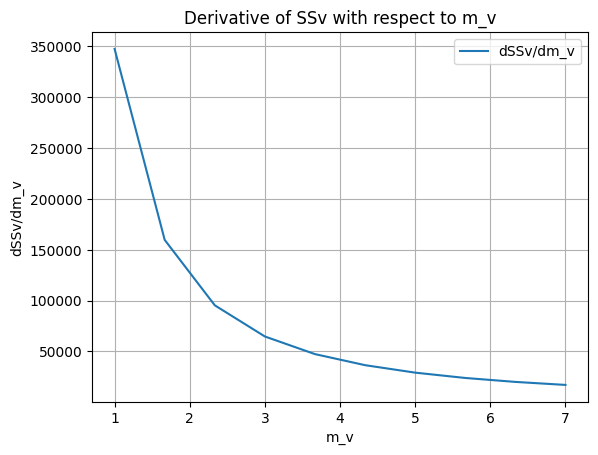

In [ ]:
import sympy as sp

m_v, p_v, V_Il, E_Il, l, Sup_v, phi_va, Z = sp.symbols('m_v p_v V_Il E_Il l Sup_v phi_va Z')


dSSv = (phi_va-1)*Z*(Sup_v/m_v)*((m_v*p_v-m_v*(p_v**2)+(m_v**2)*(p_v**2))*V_Il+(m_v*p_v-m_v*(p_v**2))*((l**2)+2*l*E_Il+(E_Il**2)))**(1/2)
dSSv_dm_v = sp.diff(dSSv, m_v)


# Simplify the expression for clarity in order to reduce the running time
dSSv_dm_v_simplified = dSSv_dm_v.simplify()


# Parameters:
n = {p_v: 0.2, V_Il: 11025, E_Il: 255, l: 7, Sup_v: 26369, phi_va: 0.75, Z: 0.95} # phi_va r.v. := W_va/ sum of W_va (0,1)!

# Create a lambda function
dSSv_dm_v_func = sp.lambdify(m_v, dSSv_dm_v_simplified.subs(n), 'numpy')


# Values for m_v ranging from 0.01 to 20, avoiding zero to prevent division by zero errors
m_v_values = np.linspace(1, 7, 10)


# Evaluate the derivative
dSSv_dm_v_values = dSSv_dm_v_func(m_v_values)



plt.plot(m_v_values, dSSv_dm_v_values, label='dSSv/dm_v')
plt.title('Derivative of SSv with respect to m_v')
plt.xlabel('m_v')
plt.ylabel('dSSv/dm_v')
plt.grid(True)
plt.legend()


dSSv_dm_v_simplified

0.5*Sup_v*Z*(phi_va - 1)*(V_Il*(2*m_v*p_v - 2*p_v + 1) - (2*p_v - 1)*(E_Il**2 + 2*E_Il*l + l**2))/(m_v*p_v*(V_Il*(m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 + 2*E_Il*l + l**2)))**0.5

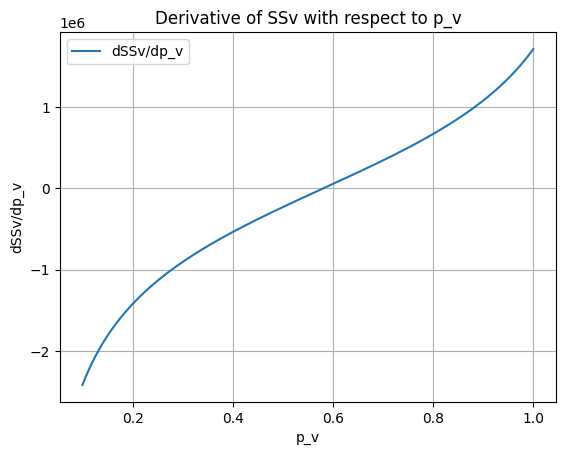

In [ ]:
import sympy as sp

m_v, p_v, V_Il, E_Il, l, Sup_v, phi_va, Z = sp.symbols('m_v p_v V_Il E_Il l Sup_v phi_va Z')


dSSv = (phi_va-1)*Z*(Sup_v/m_v)*((m_v*p_v-m_v*(p_v**2)+(m_v**2)*(p_v**2))*V_Il+(m_v*p_v-m_v*(p_v**2))*((l**2)+2*l*E_Il+(E_Il**2)))**(1/2)
dSSv_dp_v = sp.diff(dSSv, p_v)


# Simplify the expression for clarity in order to reduce the running time
dSSv_dp_v_simplified = dSSv_dp_v.simplify()


# Parameters:
n = {m_v: 1, V_Il: 11025, E_Il: 255, l: 7, Sup_v: 26369, phi_va: 0.75, Z: 0.95} # phi_va r.v. := W_va/ sum of W_va (0,1)!

# Create a lambda function
dSSv_dp_v_func = sp.lambdify(p_v, dSSv_dp_v_simplified.subs(n), 'numpy')



p_v_values = np.linspace(0.1, 1, 1000)


# Evaluate the derivative
dSSv_dp_v_values = dSSv_dp_v_func(p_v_values)



plt.plot(p_v_values, dSSv_dp_v_values, label='dSSv/dp_v')
plt.title('Derivative of SSv with respect to p_v')
plt.xlabel('p_v')
plt.ylabel('dSSv/dp_v')
plt.grid(True)
plt.legend()


dSSv_dp_v_simplified

-1.0*Sup_v*Z*p_v*(E_Il + l)*(p_v - 1)*(phi_va - 1)/(m_v*p_v*(V_Il*(m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 + 2*E_Il*l + l**2)))**0.5

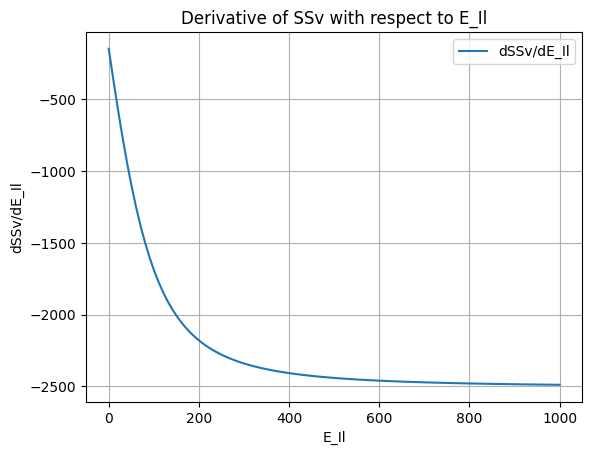

In [ ]:
import sympy as sp

m_v, p_v, V_Il, E_Il, l, Sup_v, phi_va, Z = sp.symbols('m_v p_v V_Il E_Il l Sup_v phi_va Z')


dSSv = (phi_va-1)*Z*(Sup_v/m_v)*((m_v*p_v-m_v*(p_v**2)+(m_v**2)*(p_v**2))*V_Il+(m_v*p_v-m_v*(p_v**2))*((l**2)+2*l*E_Il+(E_Il**2)))**(1/2)
dSSv_dE = sp.diff(dSSv, E_Il)


# Simplify the expression for clarity in order to reduce the running time
dSSv_dE_simplified = dSSv_dE.simplify()


# Parameters:
n = {m_v: 1, V_Il: 11025, p_v: 0.20, l: 7, Sup_v: 26369, phi_va: 0.75, Z: 0.95} # phi_va r.v. := W_va/ sum of W_va (0,1)!

# Create a lambda function
dSSv_dE_func = sp.lambdify(E_Il, dSSv_dE_simplified.subs(n), 'numpy')


E_Il_values = np.linspace(0.1, 1000, 100)


# Evaluate the derivative
dSSv_dE_values = dSSv_dE_func(E_Il_values)



plt.plot(E_Il_values, dSSv_dE_values, label='dSSv/dE_Il')
plt.title('Derivative of SSv with respect to E_Il')
plt.xlabel('E_Il')
plt.ylabel('dSSv/dE_Il')
plt.grid(True)
plt.legend()


dSSv_dE_simplified

0.5*Sup_v*Z*p_v*(phi_va - 1)*(m_v*p_v - p_v + 1)/(m_v*p_v*(V_Il*(m_v*p_v - p_v + 1) - (p_v - 1)*(E_Il**2 + 2*E_Il*l + l**2)))**0.5

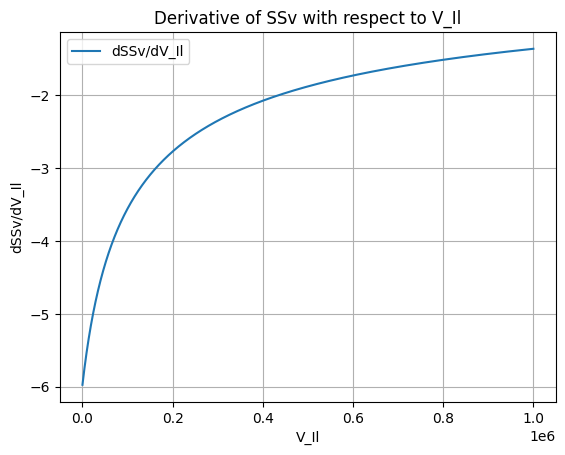

In [ ]:
import sympy as sp

m_v, p_v, V_Il, E_Il, l, Sup_v, phi_va, Z = sp.symbols('m_v p_v V_Il E_Il l Sup_v phi_va Z')


dSSv = (phi_va-1)*Z*(Sup_v/m_v)*((m_v*p_v-m_v*(p_v**2)+(m_v**2)*(p_v**2))*V_Il+(m_v*p_v-m_v*(p_v**2))*((l**2)+2*l*E_Il+(E_Il**2)))**(1/2)
dSSv_dV = sp.diff(dSSv, V_Il)


# Simplify the expression for clarity in order to reduce the running time
dSSv_dV_simplified = dSSv_dV.simplify()


# Parameters:
n = {m_v: 1, p_v: 0.2, E_Il: 255, l: 7, Sup_v: 26369, phi_va: 0.75, Z: 0.95} # phi_va r.v. := W_va/ sum of W_va (0,1)!

# Create a lambda function
dSSv_dV_func = sp.lambdify(V_Il, dSSv_dV_simplified.subs(n), 'numpy')



V_Il_values = np.linspace(0.1, 1000000, 1000000)


# Evaluate the derivative
dSSv_dV_values = dSSv_dV_func(V_Il_values)



plt.plot(V_Il_values, dSSv_dV_values, label='dSSv/dV_Il')
plt.title('Derivative of SSv with respect to V_Il')
plt.xlabel('V_Il')
plt.ylabel('dSSv/dV_Il')
plt.grid(True)
plt.legend()


dSSv_dV_simplified

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

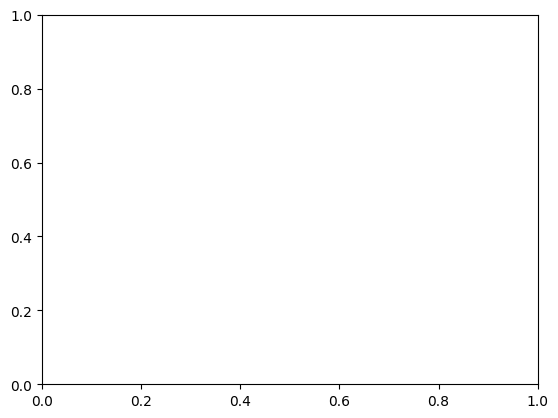

In [ ]:
import sympy as sp

m_v, p_v, V_Il, E_Il, l, Sup_v, phi_va, Z = sp.symbols('m_v p_v V_Il E_Il l Sup_v phi_va Z')


dSSv = (phi_va-1)*Z*(Sup_v/m_v)*((m_v*p_v-m_v*(p_v**2)+(m_v**2)*(p_v**2))*V_Il+(m_v*p_v-m_v*(p_v**2))*((l**2)+2*l*E_Il+(E_Il**2)))**(1/2)
dSSv_dSup_v = sp.diff(dSSv, Sup_v)


# Simplify the expression for clarity in order to reduce the running time
dSSv_dSup_v_simplified = dSSv_dSup_v.simplify()


# Parameters:
n = {m_v: 1, V_Il: 11025, E_Il: 255, l: 7, p_v:0.2, phi_va: 0.75, Z: 0.95} # phi_va r.v. := W_va/ sum of W_va (0,1)!

# Create a lambda function
dSSv_dSup_v_func = sp.lambdify(Sup_v, dSSv_dSup_v_simplified.subs(n), 'numpy')


Sup_v_values = np.linspace(0.1, 100000, 100)


# Evaluate the derivative
dSSv_dSup_v_values = dSSv_dSup_v_func(Sup_v_values)



plt.plot(Sup_v_values, dSSv_dSup_v_values, label='dSSv/dSup_v')
plt.title('Derivative of SSv with respect to Sup_v')
plt.xlabel('Sup_v')
plt.ylabel('dSSv/dSup_v')
plt.grid(True)
plt.legend()


dSSv_dSup_v_simplified


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Data specific to the Penta vaccine
data = {
    'vaccine': ['Penta'],
    'Sup_v': [26368.555349],
    'm_v': [1],
    'p_v': [0.20],
    'mu_I_l': [255],
    'sigma_I_l': [105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for the Penta vaccine
phi_va = {
    'Penta': { 'Hib': 0.125, 'HepB': 0.125}
}

# Define the antigens that Penta vaccine affects
antigens = [ 'Hib', 'HepB']

def calculate_penta_outcome(df):
    l = 7  # Lead time
    alpha = 0.90  # Service level

    # Assuming there is only one row for the Penta vaccine
    row = df.iloc[0]
    vaccine = row['vaccine']
    E_N_v = row['m_v'] * row['p_v']
    V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
    total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
    total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v*(row['sigma_I_l']**2))+V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

    # Calculate the vaccine's contribution to each antigen it supplies
    vaccine_contributions = {ant: phi_va[vaccine][ant] * total_supplied for ant in phi_va[vaccine]}
    critical_antigen = max(vaccine_contributions, key= vaccine_contributions.get)

    E_D_v = vaccine_contributions[critical_antigen]
    V_D_v = (phi_va[vaccine][critical_antigen]**2) * total_variance
    SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
    R_v = E_D_v + SS_v

    return {
        'Vaccine': vaccine,
        'Critical Antigen': critical_antigen,
        'Expected Lead-time Demand': E_D_v,
        'Safety Stock': SS_v,
        'Re-order Level': R_v
    }

# Calculate and print the outcome for the Penta vaccine
outcome = calculate_penta_outcome(df)
print(f"Vaccine: {outcome['Vaccine']}, Critical Antigen: {outcome['Critical Antigen']}, Expected Lead-time Demand: {outcome['Expected Lead-time Demand']}, Safety Stock: {outcome['Safety Stock']}, Re-order Level: {outcome['Re-order Level']}")


Vaccine: Penta, Critical Antigen: Hib, Expected Lead-time Demand: 172714.03753595, Safety Stock: 485090.2695318683, Re-order Level: 657804.3070678182


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Data specific to the Penta vaccine
data = {
    'vaccine': ['Penta'],
    'Sup_v': [26368.555349],
    'm_v': [1],
    'p_v': [0.20],
    'mu_I_l': [255],
    'sigma_I_l': [105]
}
df = pd.DataFrame(data)

# Effectiveness per antigen for the Penta vaccine
phi_va = {
    'Penta': {'DTwP': 0.3, 'Hib': 0.2, 'HepB': 0.5}
}

def simulate_supply_interruption(antigen, reduction_factor):
    # Adjust effectiveness of the specified antigen by the reduction factor
    phi_va_adjusted = phi_va.copy()
    phi_va_adjusted['Penta'][antigen] *= reduction_factor

    l = 7  # Lead time
    alpha = 0.95  # Service level

    # Extract the Penta vaccine row
    row = df.iloc[0]
    vaccine = row['vaccine']
    E_N_v = row['m_v'] * row['p_v']
    V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])
    total_supplied = (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l'])
    total_variance = ((row['Sup_v'] / row['m_v'])**2) * ((V_N_v*(row['sigma_I_l']**2))+V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2))

    # Calculate the vaccine's contribution to each antigen with the adjusted effectiveness
    vaccine_contributions = {ant: phi_va_adjusted['Penta'][ant] * total_supplied for ant in phi_va_adjusted['Penta']}
    critical_antigen = max(vaccine_contributions, key= vaccine_contributions.get)

    E_D_v = vaccine_contributions[critical_antigen]
    V_D_v = (phi_va_adjusted['Penta'][critical_antigen]**2) * total_variance
    SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
    R_v = E_D_v + SS_v

    return {
        'Vaccine': vaccine,
        'Critical Antigen': critical_antigen,
        'Expected Lead-time Demand': E_D_v,
        'Safety Stock': SS_v,
        'Re-order Level': R_v
    }

# Example simulation: reduce the effectiveness of 'Hib' antigen by 50%
outcome_adjusted = simulate_supply_interruption('Hib', 0.5)
print(f"After interruption in 'Hib' antigen:")
print(f"Vaccine: {outcome_adjusted['Vaccine']}, Critical Antigen: {outcome_adjusted['Critical Antigen']}, Expected Lead-time Demand: {outcome_adjusted['Expected Lead-time Demand']}, Safety Stock: {outcome_adjusted['Safety Stock']}, Re-order Level: {outcome_adjusted['Re-order Level']}")


After interruption in 'Hib' antigen:
Vaccine: Penta, Critical Antigen: HepB, Expected Lead-time Demand: 690856.1501438, Safety Stock: 2490426.482056659, Re-order Level: 3181282.632200459


In [ ]:
# the scenario where only Penta vaccine is in the system and one antigen is missing
penta_data = {
    'vaccine': ['Penta'],
    'Sup_v': [26368.555349],
    'm_v': [1],
    'p_v': [0.20],  # Assuming one antigen missing, so the probability is 20%
    'mu_I_l': [255],
    'sigma_I_l': [105]
}
penta_df = pd.DataFrame(penta_data)

# Calculate outcomes for the scenario with only Penta vaccine and one missing antigen
penta_outcomes = calculate_outcomes(penta_df)

# Get the information for Penta vaccine
penta_info = penta_outcomes['Penta']

# Calculate the total reorder quantity needed (Expected Lead-time Demand + Safety Stock)
total_reorder_quantity = penta_info['Expected Lead-time Demand'] + penta_info['Safety Stock']

print(f"Total Penta vaccine to reorder to fill the gap and cover safety stock: {total_reorder_quantity}")


Total Penta vaccine to reorder to fill the gap and cover safety stock: 3181282.632200459


In [ ]:
import sympy as sp

# Define symbols
m_v, p_v, Sup_v, mu_I_l, sigma_I_l, l, Z_alpha = sp.symbols('m_v p_v Sup_v mu_I_l sigma_I_l l Z_alpha')

# Define V[K_v]
V_K_v = (Sup_v/m_v)**2 * (m_v*p_v*(1-p_v)*(l**2 + 2*l*mu_I_l + mu_I_l**2) + (m_v*p_v)**2 * sigma_I_l**2)

# Define SS
SS = Z_alpha * sp.sqrt(V_K_v)

# Compute partial derivatives
partial_m_v = sp.diff(SS, m_v)
partial_p_v = sp.diff(SS, p_v)
partial_Sup_v = sp.diff(SS, Sup_v)
partial_mu_I_l = sp.diff(SS, mu_I_l)
partial_sigma_I_l = sp.diff(SS, sigma_I_l)

# Display the results
print("Partial Derivative with respect to m_v:", partial_m_v)
print("Partial Derivative with respect to p_v:", partial_p_v)
print("Partial Derivative with respect to Sup_v:", partial_Sup_v)
print("Partial Derivative with respect to mu_I_l:", partial_mu_I_l)
print("Partial Derivative with respect to sigma_I_l:", partial_sigma_I_l)


Partial Derivative with respect to m_v: Z_alpha*m_v**2*sqrt(Sup_v**2*(m_v**2*p_v**2*sigma_I_l**2 + m_v*p_v*(1 - p_v)*(l**2 + 2*l*mu_I_l + mu_I_l**2))/m_v**2)*(Sup_v**2*(2*m_v*p_v**2*sigma_I_l**2 + p_v*(1 - p_v)*(l**2 + 2*l*mu_I_l + mu_I_l**2))/(2*m_v**2) - Sup_v**2*(m_v**2*p_v**2*sigma_I_l**2 + m_v*p_v*(1 - p_v)*(l**2 + 2*l*mu_I_l + mu_I_l**2))/m_v**3)/(Sup_v**2*(m_v**2*p_v**2*sigma_I_l**2 + m_v*p_v*(1 - p_v)*(l**2 + 2*l*mu_I_l + mu_I_l**2)))
Partial Derivative with respect to p_v: Z_alpha*sqrt(Sup_v**2*(m_v**2*p_v**2*sigma_I_l**2 + m_v*p_v*(1 - p_v)*(l**2 + 2*l*mu_I_l + mu_I_l**2))/m_v**2)*(2*m_v**2*p_v*sigma_I_l**2 - m_v*p_v*(l**2 + 2*l*mu_I_l + mu_I_l**2) + m_v*(1 - p_v)*(l**2 + 2*l*mu_I_l + mu_I_l**2))/(2*(m_v**2*p_v**2*sigma_I_l**2 + m_v*p_v*(1 - p_v)*(l**2 + 2*l*mu_I_l + mu_I_l**2)))
Partial Derivative with respect to Sup_v: Z_alpha*sqrt(Sup_v**2*(m_v**2*p_v**2*sigma_I_l**2 + m_v*p_v*(1 - p_v)*(l**2 + 2*l*mu_I_l + mu_I_l**2))/m_v**2)/Sup_v
Partial Derivative with respect to mu_I_

In [ ]:
# import numpy as np
# import pandas as pd
# from scipy.stats import norm
# import matplotlib.pyplot as plt

# # Load the data
# data = {
#     'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
#     'Sup_v': [26368.555349, 1022.454187, 438.5176595975, 9232.92456283411],
#     'm_v': [1, 7, 7, 1],
#     'p_v': [0.20, 0.06, 0.06, 0.20],
#     'mu_I_l': [255, 255, 255, 255],
#     'sigma_I_l': [105, 105, 105,105]
# }
# df = pd.DataFrame(data)

# # Constants
# l = 7  # Lead time in days
# alpha = 0.95  # Service level

# def calculate_safety_stock(df):
#     df['E_N_v'] = df['m_v'] * df['p_v']
#     df['V_N_v'] = df['m_v'] * df['p_v'] * (1 - df['p_v'])
#     df['E_K_v'] = (df['Sup_v'] / df['m_v']) * df['E_N_v'] * (l + df['mu_I_l'])
#     df['V_K_v'] = ((df['Sup_v'] / df['m_v'])**2) * (df['V_N_v']*(df['sigma_I_l']**2)+df['V_N_v'] * (l**2 + 2 * l * df['mu_I_l'] + df['mu_I_l']**2) + df['E_N_v']**2 * (df['sigma_I_l']**2))
#     df['SS_v'] = norm.ppf(alpha) * np.sqrt(df['V_K_v'])
#     return df

# def sensitivity_analysis(param, variations):
#     results = []
#     original_values = df[param].copy()
#     for variation in variations:
#         df[param] = original_values * variation
#         results.append(calculate_safety_stock(df)['SS_v'].values)
#     df[param] = original_values  # Restore original data
#     return results

# # Parameters to vary and their ranges
# params_to_vary = ['m_v', 'p_v', 'Sup_v', 'mu_I_l', 'sigma_I_l']
# variations = [0.8, 1.0, 1.2]  # 80%, 100%, 120% of the original value

# # Perform sensitivity analysis and plot
# fig, ax = plt.subplots(figsize=(10, 6))
# for param in params_to_vary:
#     results = sensitivity_analysis(param, variations)
#     for i, vaccine in enumerate(df['vaccine']):
#         ax.plot(variations, [result[i] for result in results], label=f'{param} - {vaccine}')

# ax.set_xlabel('Variation Factor')
# ax.set_ylabel('Safety Stock')
# ax.set_title('Sensitivity Analysis of Safety Stock to Parameter Variations')
# ax.legend()
# plt.show()


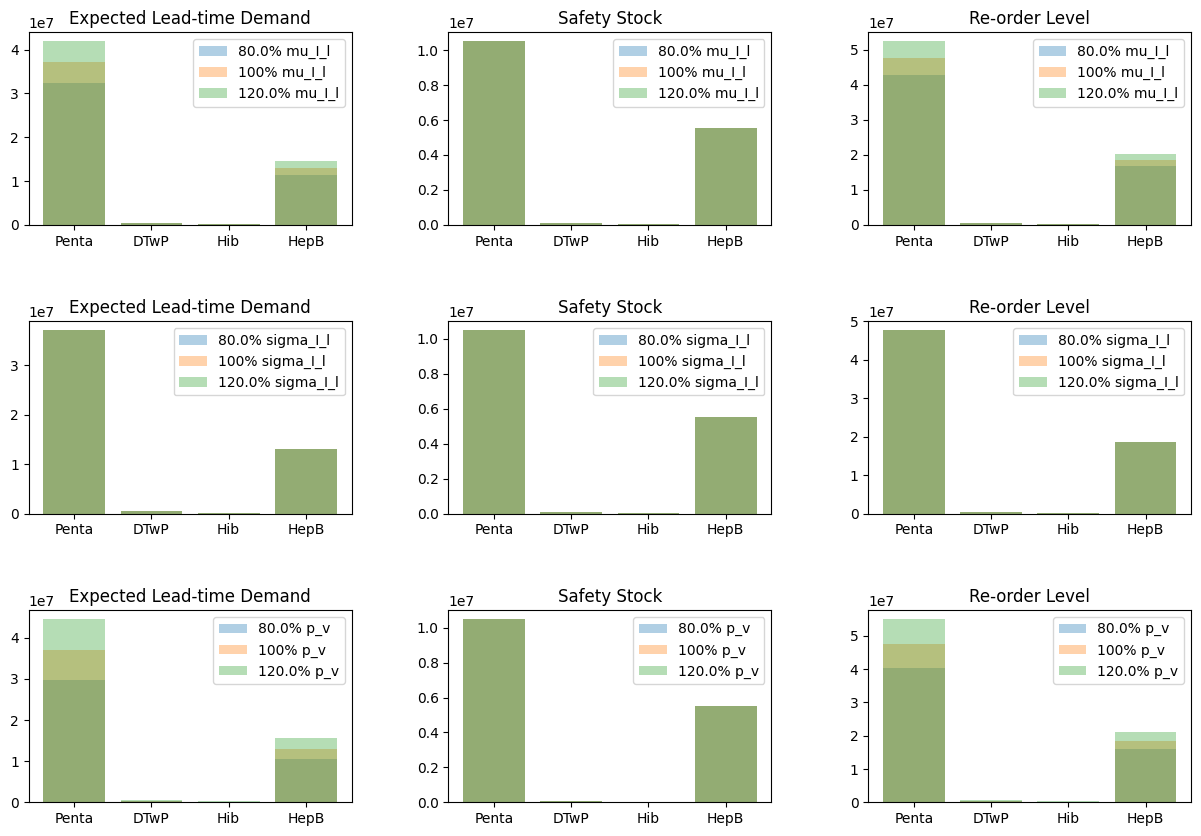

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

base_data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [9624522.7025276, 373195.778261274, 160058.945753099, 3370017.46543445],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [12.3, 12.3, 12.3, 12.3],
    'sigma_I_l': [42.06, 42.06, 42.06,42.06],
    'phi_va': [[0.6, 0.2, 0.2], [1.0, 0, 0], [ 0, 1.0, 0], [ 0, 0, 1.0]]  # For Penta, DTwP, Hib, HepB
}
df = pd.DataFrame(base_data)

# Antigen names for reference
antigens = ['DTwP', 'Hib', 'HepB']

# Function to calculate outcomes
def calculate_outcomes(df):
    l = 7  # Lead time
    alpha = 0.95  # Service level
    results = {'Expected Lead-time Demand': [], 'Safety Stock': [], 'Re-order Level': []}

    for index, row in df.iterrows():
        E_N_v = row['m_v'] * row['p_v']
        V_N_v = row['m_v'] * row['p_v'] * (1 - row['p_v'])

        E_D_v = sum(np.array(row['phi_va']) * (row['Sup_v'] / row['m_v']) * E_N_v * (l + row['mu_I_l']))
        V_D_v = sum(np.array(row['phi_va'])**2 * (((row['Sup_v'] / row['m_v'])**2) +V_N_v * (l**2 + 2 * l * row['mu_I_l'] + row['mu_I_l']**2) + E_N_v**2 * (row['sigma_I_l']**2)))

        SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)
        R_v = E_D_v + SS_v

        results['Expected Lead-time Demand'].append(E_D_v)
        results['Safety Stock'].append(SS_v)
        results['Re-order Level'].append(R_v)
    return results

# Vary each parameter and plot results
params_to_vary = ['mu_I_l', 'sigma_I_l', 'p_v']
vary_factor = [0.8, 1, 1.2]  # Vary parameters by -20%, 0%, +20%

fig, axes = plt.subplots(nrows=len(params_to_vary), ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for idx, param in enumerate(params_to_vary):
    for jdx, factor in enumerate(vary_factor):
        temp_df = df.copy()
        temp_df[param] = temp_df[param] * factor
        outcomes = calculate_outcomes(temp_df)

        # Plotting
        for kdx, key in enumerate(['Expected Lead-time Demand', 'Safety Stock', 'Re-order Level']):
            ax = axes[idx, kdx]
            ax.bar(np.arange(len(df)), outcomes[key], alpha=0.35, label=f'{factor*100}% {param}')
            ax.set_title(f'{key}')
            ax.set_xticks(np.arange(len(df)))
            ax.set_xticklabels(df['vaccine'])
            ax.legend()

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define vaccine data
data = {
    'vaccine': ['Penta', 'DTwP', 'Hib', 'HepB'],
    'Sup_v': [9624522.7025276, 373195.778261274, 160058.945753099, 3370017.46543445],
    'm_v': [1, 7, 7, 1],
    'p_v': [0.20, 0.06, 0.06, 0.20],
    'mu_I_l': [12.3, 12.3, 12.3, 12.3],
    'sigma_I_l': [150, 150, 150,150],
}
df = pd.DataFrame(data)

# Constants
l = 7  # Lead time in days
alpha = 0.95  # Service level

# Calculate expected numbers of interruption and its variance
df['E_N_v'] = df['m_v'] * df['p_v']
df['V_N_v'] = df['m_v'] * df['p_v'] * (1 - df['p_v'])

# Calculate expected K_v and variance V[K_v]
df['E_K_v'] = (df['Sup_v'] / df['m_v']) * df['E_N_v'] * (l + df['mu_I_l'])
df['V_K_v'] = ((df['Sup_v'] / df['m_v'])**2) * ((df['V_N_v'] * (df['sigma_I_l']**2)) + df['V_N_v'] * (l**2 + 2 * l * df['mu_I_l'] + df['mu_I_l']**2) + df['E_N_v']**2 * (df['sigma_I_l']**2))

# Define vaccine to antigen mapping and fraction contributions
phi_va = {
    'Penta': {'DTwP': 0.6, 'Hib': 0.2, 'HepB': 0.2},
    'DTwP': {'DTwP': 1.0},
    'Hib': {'Hib': 1.0},
    'HepB': {'HepB': 1.0}
}

A_v = {
    'Penta': ['DTwP', 'Hib', 'HepB'],
    'DTwP': ['DTwP'],
    'Hib': ['Hib'],
    'HepB': ['HepB']
}

# Calculate expected lead-time demand and its variance for antigens
D_a = {antigen: 0 for sublist in A_v.values() for antigen in sublist}
V_D_a = {antigen: 0 for sublist in A_v.values() for antigen in sublist}

for vaccine, antigens in A_v.items():
    for antigen in antigens:
        phi = phi_va[vaccine][antigen]
        D_a[antigen] += phi * df.loc[df['vaccine'] == vaccine, 'E_K_v'].values[0]
        V_D_a[antigen] += phi**2 * df.loc[df['vaccine'] == vaccine, 'V_K_v'].values[0]

# Calculate safety stock and re-order level for each vaccine
results = {}
for vaccine in A_v:
    critical_antigen = max(A_v[vaccine], key=lambda x: phi_va[vaccine][x] * D_a[x])  # Antigen with the max expected demand
    phi = phi_va[vaccine][critical_antigen]
    E_D_v = phi * D_a[critical_antigen]  # Expected demand for the vaccine
    V_D_v = phi**2 * V_D_a[critical_antigen]  # Variance for the vaccine
    SS_v = norm.ppf(alpha) * np.sqrt(V_D_v)  # Safety stock
    R_v = E_D_v + SS_v  # Re-order level

    results[vaccine] = {
        'Critical Antigen': critical_antigen,
        'Expected Lead-time Demand': E_D_v,
        'Variance of Demand': V_D_v,
        'Safety Stock': SS_v,
        'Re-order Level': R_v
    }

# Display the results
results


{'Penta': {'Critical Antigen': 'DTwP',
  'Expected Lead-time Demand': 13633533.174168285,
  'Variance of Demand': 5.475143626870693e+16,
  'Safety Stock': 384879708.4793146,
  'Re-order Level': 398513241.6534829},
 'DTwP': {'Critical Antigen': 'DTwP',
  'Expected Lead-time Demand': 22722555.290280476,
  'Variance of Demand': 1.5208732296863037e+17,
  'Safety Stock': 641466180.7988577,
  'Re-order Level': 664188736.0891382},
 'Hib': {'Critical Antigen': 'Hib',
  'Expected Lead-time Demand': 7615479.7855333965,
  'Variance of Demand': 1.6901282473331034e+16,
  'Safety Stock': 213839084.73788956,
  'Re-order Level': 221454564.52342296},
 'HepB': {'Critical Antigen': 'HepB',
  'Expected Lead-time Demand': 20438398.942928288,
  'Variance of Demand': 6.8677925935984264e+16,
  'Safety Stock': 431058131.7606151,
  'Re-order Level': 451496530.7035434}}